In [1]:
%matplotlib inline
import pandas as pd # Далее идет импорт библиотек...
import numpy
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot') # Стиль отображения графиков
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras import losses

Using TensorFlow backend.


In [2]:
import os
os.chdir('C:/Users/Admin/Desktop/КЕЙС/nn') # Путь куда это все будет сохраняться на моем пк

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'C:/Users/Admin/Desktop/КЕЙС/nn'

In [ ]:
file_with_PRODAJI = 'C:/Users/Admin/Desktop/КТО СЮДА ЗАЙДЕТ, ТОТ ОТ КОКА УМРЕТ/Moe tvorenie/gpn_intellegence_cup/КЕЙС/data_science_case-data/sales.tsv' # Путь до датасетов на моем пк
file_with_POKUPATELI = 'C:/Users/Admin/Desktop/КЕЙС/data_science_case-data/customers.tsv' # Путь до датасетов на моем пк

In [ ]:
df1 = pd.read_csv(file_with_PRODAJI, delimiter='\t', encoding='utf-8')    # Читаем датасет
df1.fillna(0, inplace=True)                                               # Избавляемся от NaN
df2 = pd.read_csv(file_with_POKUPATELI, delimiter='\t', encoding='utf-8')
df2.fillna(0, inplace=True)

In [ ]:
df1['year'] = df1.year.map(str) + '-' + df1.month.map(str) # Соединяем стобцы 'year' и 'month' в один
df1.drop('month', axis=1, inplace=True)                    # Сбрасываем из датасета не нужный столбец 'month'
df1.tail()                                                 # Проверяем конец датасета на наличие всяких битых приколов и пояснеий

In [ ]:
df_for_AC = df1.loc[(df1['location'] == 'Alpha City')] # Обозначаем локацию в которой будем работать
df_for_AC.drop('location', axis=1, inplace=True)       # Сбрасываем все ненужные столбцы данных, ОСОБЕННО str
df_for_AC.drop('ira', axis=1, inplace=True)
df_for_AC.drop('product_category', axis=1, inplace=True)
df_for_AC.drop('brand', axis=1, inplace=True)
df_for_AC.drop('item_per_bundle', axis=1, inplace=True)
df_for_AC.drop('shape', axis=1, inplace=True)
df_for_AC.drop('with_alcohol', axis=1, inplace=True)
df_for_AC.drop('filling', axis=1, inplace=True)
df_for_AC.drop('price', axis=1, inplace=True)         

In [ ]:
# -SKU#15-

In [ ]:
AC_sku15 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #15')] # Настраиваем датасет на первый из доступных sku
AC_sku15.drop('sku_id', axis=1, inplace=True)                # Затем сбрасываем столбец с ним
#AC_sku15.iloc[:,1].plot()                                   # Строим график продаж на известные нам даты
NN_AC_sku15 = pd.DataFrame()                                 # Создаем новый дата сет для нейронки

for i in range(12,0,-1):                                     # Преобразуем данные для предсказаний нейронной сети
    NN_AC_sku15['t-' + str(i)] = AC_sku15.iloc[:,1].shift(i) # Сдвигаем наши наблюдения
    
NN_AC_sku15['t'] = AC_sku15.iloc[:,1].values                 # Записываем исходный ряд в последний столбец
#print(NN_AC_sku15.head(13))                                 # Проверяем

new_NN_AC_sku15 = NN_AC_sku15[12:]                           # Отрезаем первые 12 строк, чтобы избавиться от NaN
#new_NN_AC_sku15.head()                                      # Проверяем что сделали

y = new_NN_AC_sku15['t']                                     # Разделям у и х. у - отклик
x = new_NN_AC_sku15.drop('t', axis=1)                        # х - предикторы, после отбрасывания последнего столбца

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train = x[:15]                                             # Разделяем на обучающую и тестовую выборки
y_train = y[:15]                                             # Для тестовой отрезаем последние наблюдения, в нашем случае
x_test = x[15:]                                              # это 3 месяца, на них и будет основываться наш прогноз
y_test = y[15:]

#print(new_NN_AC_sku15.shape)                                # Определяем размерности
#print(x_train.shape)
#print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)
#print(x_train.head(5))                                      # Проверяем

x_train = x_train.values                                     # Преобразуем в матрицы numpy чтобы их смог прочесть keras
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values

# NN

model = Sequential()
model.add(Dense(6, input_dim=12, activation='relu'))        # Ставим 6 нейронов, по 12 димов, т.к у нас 12 месяцев, активируем relu
model.add(Dense(1, activation='linear'))                    # Поскольку у нас задача регрессии, то берем линейную функцию, выходной нейрон 1
model.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape']) # потери mse, оптимайзер adam, метрика по mape
model.fit(x_train, y_train, epochs=300, batch_size=None)    # Модель тренеровки, 300 эпох, снимаю батчи, т.к данных не много

In [115]:
scores = model.evaluate(x_test, y_test) # Проверяем качество на тестовом множестве
y_pred = model.predict(x_test)          # Задаем y_pred

def smape(y_test, y_pred):
    return 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred))) # Формула SMAPE

print(smape(y_test, y_pred))
# Подсчитали SMAPE

3/3 [==============================] - 1s 316ms/step
129.63360665792177


(15, 12)
(15,)
(3, 12)
(3,)
(30, 13)


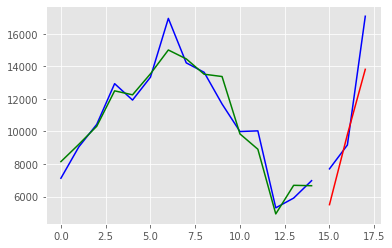

In [118]:
predictions = model.predict(x_test)                # Вычисляем прогноз
predictions_train = model.predict(x_train)         # Подгонка

print(x_train.shape)                               # Еще раз все проверяем
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(NN_AC_sku15.shape)

x2 = numpy.arange(0, 15, 1)                        # задаем наши числа 
x3 = numpy.arange(15, 18, 1)

plt.plot(x2, y_train, color='blue')                # обучающая
plt.plot(x2, predictions_train, color='green')     # подгонка
plt.plot(x3, y_test, color='blue')                 # тестовая
plt.plot(x3, predictions, color='red')             # прогноз

# redline - прогноз, greenline - подгонка

# ДАЛЬШЕ ПО КОДУ, ВСE ПОВТОРЯЕТСЯ

In [333]:
print(predictions)

[[ 5504.54 ]
 [ 9805.196]
 [13816.373]]


In [15]:
# -SKU#16-

In [134]:
AC_sku16 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #16')]
AC_sku16.drop('sku_id', axis=1, inplace=True)
#AC_sku16.iloc[:,1].plot()

NN_AC_sku16 = pd.DataFrame()

for i in range(12,0,-1):
    NN_AC_sku16['t-' + str(i)] = AC_sku16.iloc[:,1].shift(i)
    
NN_AC_sku16['t'] = AC_sku16.iloc[:,1].values
#print(NN_AC_sku16.head(13))

new_NN_AC_sku16 = NN_AC_sku16[12:]
new_NN_AC_sku16.head()

y1 = new_NN_AC_sku16['t']
x1 = new_NN_AC_sku16.drop('t', axis=1)

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train1 = x1[:15]
y_train1 = y1[:15]
x_test1 = x1[15:]
y_test1 = y1[15:]

#print(new_NN_AC_sku16.shape)
#print(x_train1.shape)
#print(y_train1.shape)
#print(x_test1.shape)
#print(y_test1.shape)
#print(x_train1.head(5))

x_train1 = x_train1.values
y_train1 = y_train1.values
x_test1 = x_test1.values
y_test1 = y_test1.values

# NN

model1 = Sequential()
model1.add(Dense(6, input_dim=12, activation='relu'))
model1.add(Dense(1, activation='linear'))
model1.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape'])
model1.fit(x_train1, y_train1, epochs=300, batch_size=None)

Epoch 1/300
15/15 [==============================] - 3s 188ms/step - loss: 7620564.5000 - mean_absolute_percentage_error: 41.1442
Epoch 2/300
15/15 [==============================] - 0s 0us/step - loss: 7142690.5000 - mean_absolute_percentage_error: 40.0515
Epoch 3/300
15/15 [==============================] - 0s 1ms/step - loss: 6723108.5000 - mean_absolute_percentage_error: 38.9658
Epoch 4/300
15/15 [==============================] - 0s 199us/step - loss: 6370410.5000 - mean_absolute_percentage_error: 37.9170
Epoch 5/300
15/15 [==============================] - 0s 264us/step - loss: 6104616.5000 - mean_absolute_percentage_error: 36.9762
Epoch 6/300
15/15 [==============================] - 0s 199us/step - loss: 5891337.0000 - mean_absolute_percentage_error: 36.0626
Epoch 7/300
15/15 [==============================] - 0s 198us/step - loss: 5732321.5000 - mean_absolute_percentage_error: 35.2006
Epoch 8/300
15/15 [==============================] - 0s 263us/step - loss: 5626531.5000 - mean

Epoch 64/300
15/15 [==============================] - 0s 267us/step - loss: 3796127.5000 - mean_absolute_percentage_error: 26.7889
Epoch 65/300
15/15 [==============================] - 0s 135us/step - loss: 3770463.0000 - mean_absolute_percentage_error: 26.7156
Epoch 66/300
15/15 [==============================] - 0s 264us/step - loss: 3744933.2500 - mean_absolute_percentage_error: 26.6374
Epoch 67/300
15/15 [==============================] - 0s 198us/step - loss: 3719509.5000 - mean_absolute_percentage_error: 26.5539
Epoch 68/300
15/15 [==============================] - 0s 400us/step - loss: 3694171.2500 - mean_absolute_percentage_error: 26.4649
Epoch 69/300
15/15 [==============================] - 0s 198us/step - loss: 3668903.0000 - mean_absolute_percentage_error: 26.3705
Epoch 70/300
15/15 [==============================] - 0s 266us/step - loss: 3643698.7500 - mean_absolute_percentage_error: 26.2707
Epoch 71/300
15/15 [==============================] - 0s 401us/step - loss: 3618557

Epoch 127/300
15/15 [==============================] - 0s 199us/step - loss: 2404330.2500 - mean_absolute_percentage_error: 20.4723
Epoch 128/300
15/15 [==============================] - 0s 1ms/step - loss: 2386145.0000 - mean_absolute_percentage_error: 20.3761
Epoch 129/300
15/15 [==============================] - 0s 266us/step - loss: 2368059.5000 - mean_absolute_percentage_error: 20.2852
Epoch 130/300
15/15 [==============================] - 0s 197us/step - loss: 2350105.7500 - mean_absolute_percentage_error: 20.1926
Epoch 131/300
15/15 [==============================] - 0s 198us/step - loss: 2332259.7500 - mean_absolute_percentage_error: 20.0983
Epoch 132/300
15/15 [==============================] - 0s 266us/step - loss: 2314521.7500 - mean_absolute_percentage_error: 20.0024
Epoch 133/300
15/15 [==============================] - 0s 262us/step - loss: 2296890.5000 - mean_absolute_percentage_error: 19.9052
Epoch 134/300
15/15 [==============================] - 0s 266us/step - loss: 2

Epoch 190/300
15/15 [==============================] - 0s 399us/step - loss: 1466614.1250 - mean_absolute_percentage_error: 15.0370
Epoch 191/300
15/15 [==============================] - 0s 465us/step - loss: 1454886.7500 - mean_absolute_percentage_error: 14.9611
Epoch 192/300
15/15 [==============================] - 0s 133us/step - loss: 1443251.2500 - mean_absolute_percentage_error: 14.8857
Epoch 193/300
15/15 [==============================] - 0s 266us/step - loss: 1431765.2500 - mean_absolute_percentage_error: 14.8114
Epoch 194/300
15/15 [==============================] - 0s 198us/step - loss: 1420298.6250 - mean_absolute_percentage_error: 14.7404
Epoch 195/300
15/15 [==============================] - 0s 333us/step - loss: 1408937.5000 - mean_absolute_percentage_error: 14.6731
Epoch 196/300
15/15 [==============================] - 0s 267us/step - loss: 1397693.6250 - mean_absolute_percentage_error: 14.6058
Epoch 197/300
15/15 [==============================] - 0s 265us/step - loss:

Epoch 253/300
15/15 [==============================] - 0s 199us/step - loss: 895167.8750 - mean_absolute_percentage_error: 12.0504
Epoch 254/300
15/15 [==============================] - 0s 332us/step - loss: 888599.0625 - mean_absolute_percentage_error: 12.0144
Epoch 255/300
15/15 [==============================] - 0s 199us/step - loss: 882096.0625 - mean_absolute_percentage_error: 11.9762
Epoch 256/300
15/15 [==============================] - 0s 200us/step - loss: 875657.1250 - mean_absolute_percentage_error: 11.9359
Epoch 257/300
15/15 [==============================] - 0s 332us/step - loss: 869282.8125 - mean_absolute_percentage_error: 11.8938
Epoch 258/300
15/15 [==============================] - 0s 332us/step - loss: 862972.9375 - mean_absolute_percentage_error: 11.8502
Epoch 259/300
15/15 [==============================] - 0s 333us/step - loss: 856729.0625 - mean_absolute_percentage_error: 11.8055
Epoch 260/300
15/15 [==============================] - 0s 198us/step - loss: 850551

In [135]:
scores1 = model1.evaluate(x_test1, y_test1)
y_pred1 = model1.predict(x_test1)

def smape(y_test1, y_pred1):
    return 100/len(y_test1) * np.sum(2 * np.abs(y_pred1 - y_test1) / (np.abs(y_test1) + np.abs(y_pred1)))

print(smape(y_test1, y_pred1))
# Подсчитали SMAPE 

3/3 [==============================] - 1s 360ms/step
30.113143950947578


(15, 12)
(15,)
(3, 12)
(3,)
(30, 13)


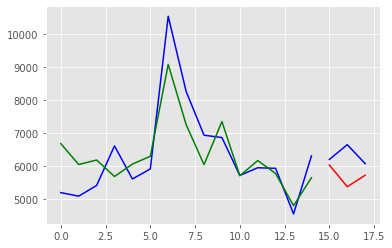

In [136]:
predictions1 = model1.predict(x_test1)
predictions_train1 = model1.predict(x_train1)

print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)
print(y_test1.shape)
print(NN_AC_sku16.shape)

x2_1 = numpy.arange(0, 15, 1)
x3_1 = numpy.arange(15, 18, 1)

plt.plot(x2_1, y_train1, color='blue')
plt.plot(x2_1, predictions_train1, color='green')
plt.plot(x3_1, y_test1, color='blue')
plt.plot(x3_1, predictions1, color='red')

# redline - прогноз, greenline - подгонка

In [334]:
print(predictions1)

[[6023.9707]
 [5362.6714]
 [5711.5063]]


In [19]:
# -SKU#22-

In [146]:
AC_sku22 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #22')]
AC_sku22.drop('sku_id', axis=1, inplace=True)
#AC_sku22.iloc[:,1].plot()

NN_AC_sku22 = pd.DataFrame()

for i in range(12,0,-1):
    NN_AC_sku22['t-' + str(i)] = AC_sku22.iloc[:,1].shift(i)
    
NN_AC_sku22['t'] = AC_sku22.iloc[:,1].values
#print(NN_AC_sku22.head(13))

new_NN_AC_sku22 = NN_AC_sku22[12:]
#new_NN_AC_sku22.head()

y2 = new_NN_AC_sku22['t']
x2 = new_NN_AC_sku22.drop('t', axis=1)

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train2 = x2[:15]
y_train2 = y2[:15]
x_test2 = x2[15:]
y_test2 = y2[15:]

#print(new_NN_AC_sku22.shape)
#print(x_train2.shape)
#print(y_train2.shape)
#print(x_test2.shape)
#print(y_test2.shape)
#print(x_train2.head(5))

x_train2 = x_train2.values
y_train2 = y_train2.values
x_test2 = x_test2.values
y_test2 = y_test2.values

# NN

model2 = Sequential()
model2.add(Dense(6, input_dim=12, activation='relu'))
model2.add(Dense(1, activation='linear'))
model2.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape'])
model2.fit(x_train2, y_train2, epochs=300, batch_size=None)

Epoch 1/300
15/15 [==============================] - 3s 206ms/step - loss: 25021480.0000 - mean_absolute_percentage_error: 31.1779
Epoch 2/300
15/15 [==============================] - 0s 197us/step - loss: 24316472.0000 - mean_absolute_percentage_error: 31.1319
Epoch 3/300
15/15 [==============================] - 0s 199us/step - loss: 23675502.0000 - mean_absolute_percentage_error: 31.0836
Epoch 4/300
15/15 [==============================] - 0s 266us/step - loss: 23096446.0000 - mean_absolute_percentage_error: 31.0254
Epoch 5/300
15/15 [==============================] - 0s 331us/step - loss: 22602014.0000 - mean_absolute_percentage_error: 31.0210
Epoch 6/300
15/15 [==============================] - 0s 197us/step - loss: 22142102.0000 - mean_absolute_percentage_error: 31.0441
Epoch 7/300
15/15 [==============================] - 0s 199us/step - loss: 21702112.0000 - mean_absolute_percentage_error: 31.0324
Epoch 8/300
15/15 [==============================] - 0s 266us/step - loss: 21294692

Epoch 64/300
15/15 [==============================] - 0s 266us/step - loss: 11099766.0000 - mean_absolute_percentage_error: 22.8371
Epoch 65/300
15/15 [==============================] - 0s 266us/step - loss: 10996186.0000 - mean_absolute_percentage_error: 22.7034
Epoch 66/300
15/15 [==============================] - 0s 199us/step - loss: 10893306.0000 - mean_absolute_percentage_error: 22.5666
Epoch 67/300
15/15 [==============================] - 0s 332us/step - loss: 10790569.0000 - mean_absolute_percentage_error: 22.4269
Epoch 68/300
15/15 [==============================] - 0s 266us/step - loss: 10689547.0000 - mean_absolute_percentage_error: 22.2872
Epoch 69/300
15/15 [==============================] - 0s 266us/step - loss: 10588874.0000 - mean_absolute_percentage_error: 22.1465
Epoch 70/300
15/15 [==============================] - 0s 332us/step - loss: 10489962.0000 - mean_absolute_percentage_error: 22.0075
Epoch 71/300
15/15 [==============================] - 0s 200us/step - loss: 

Epoch 127/300
15/15 [==============================] - 0s 198us/step - loss: 6559327.0000 - mean_absolute_percentage_error: 16.5338
Epoch 128/300
15/15 [==============================] - 0s 266us/step - loss: 6508271.0000 - mean_absolute_percentage_error: 16.4517
Epoch 129/300
15/15 [==============================] - 0s 399us/step - loss: 6457849.5000 - mean_absolute_percentage_error: 16.3704
Epoch 130/300
15/15 [==============================] - 0s 399us/step - loss: 6408144.0000 - mean_absolute_percentage_error: 16.2894
Epoch 131/300
15/15 [==============================] - 0s 266us/step - loss: 6358697.5000 - mean_absolute_percentage_error: 16.2232
Epoch 132/300
15/15 [==============================] - 0s 266us/step - loss: 6309857.0000 - mean_absolute_percentage_error: 16.1614
Epoch 133/300
15/15 [==============================] - 0s 199us/step - loss: 6261425.5000 - mean_absolute_percentage_error: 16.0982
Epoch 134/300
15/15 [==============================] - 0s 266us/step - loss:

15/15 [==============================] - 0s 199us/step - loss: 4230015.0000 - mean_absolute_percentage_error: 13.3177
Epoch 190/300
15/15 [==============================] - 0s 465us/step - loss: 4203643.5000 - mean_absolute_percentage_error: 13.2736
Epoch 191/300
15/15 [==============================] - 0s 199us/step - loss: 4177596.2500 - mean_absolute_percentage_error: 13.2297
Epoch 192/300
15/15 [==============================] - 0s 465us/step - loss: 4151802.5000 - mean_absolute_percentage_error: 13.1879
Epoch 193/300
15/15 [==============================] - 0s 200us/step - loss: 4126201.5000 - mean_absolute_percentage_error: 13.1574
Epoch 194/300
15/15 [==============================] - 0s 1ms/step - loss: 4100903.5000 - mean_absolute_percentage_error: 13.1268
Epoch 195/300
15/15 [==============================] - 0s 133us/step - loss: 4075788.7500 - mean_absolute_percentage_error: 13.0960
Epoch 196/300
15/15 [==============================] - 0s 201us/step - loss: 4050968.5000 - 

Epoch 252/300
15/15 [==============================] - 0s 332us/step - loss: 2940484.2500 - mean_absolute_percentage_error: 11.4863
Epoch 253/300
15/15 [==============================] - 0s 332us/step - loss: 2924819.7500 - mean_absolute_percentage_error: 11.4555
Epoch 254/300
15/15 [==============================] - 0s 334us/step - loss: 2911503.7500 - mean_absolute_percentage_error: 11.4289
Epoch 255/300
15/15 [==============================] - 0s 331us/step - loss: 2897811.0000 - mean_absolute_percentage_error: 11.4019
Epoch 256/300
15/15 [==============================] - 0s 201us/step - loss: 2883450.7500 - mean_absolute_percentage_error: 11.3744
Epoch 257/300
15/15 [==============================] - 0s 332us/step - loss: 2868389.2500 - mean_absolute_percentage_error: 11.3465
Epoch 258/300
15/15 [==============================] - 0s 465us/step - loss: 2853860.0000 - mean_absolute_percentage_error: 11.3205
Epoch 259/300
15/15 [==============================] - 0s 199us/step - loss:

In [147]:
scores2 = model2.evaluate(x_test2, y_test2)
y_pred2 = model2.predict(x_test2)

def smape(y_test2, y_pred2):
    return 100/len(y_test2) * np.sum(2 * np.abs(y_pred2 - y_test2) / (np.abs(y_test2) + np.abs(y_pred2)))

print(smape(y_test2, y_pred2))
# Подсчитали SMAPE 

3/3 [==============================] - 1s 394ms/step
66.60279286011378


(15, 12)
(15,)
(3, 12)
(3,)
(30, 13)


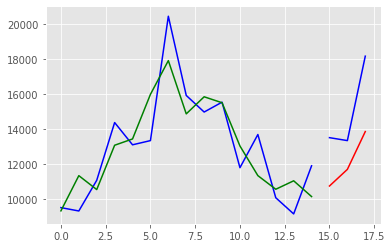

In [148]:
predictions2 = model2.predict(x_test2)
predictions_train2 = model2.predict(x_train2)

print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)
print(NN_AC_sku22.shape)

x2_2 = numpy.arange(0, 15, 1)
x3_2 = numpy.arange(15, 18, 1)

plt.plot(x2_2, y_train2, color='blue')
plt.plot(x2_2, predictions_train2, color='green')
plt.plot(x3_2, y_test2, color='blue')
plt.plot(x3_2, predictions2, color='red')

# redline - прогноз, greenline - подгонка

In [335]:
print(predictions2)

[[10738.328]
 [11688.439]
 [13847.914]]


In [23]:
# -SKU#25-

In [152]:
AC_sku25 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #25')]
AC_sku25.drop('sku_id', axis=1, inplace=True)
#AC_sku25.iloc[:,1].plot()

NN_AC_sku25 = pd.DataFrame()

for i in range(12,0,-1):
    NN_AC_sku25['t-' + str(i)] = AC_sku25.iloc[:,1].shift(i)
    
NN_AC_sku25['t'] = AC_sku25.iloc[:,1].values
#print(NN_AC_sku25.head(13))

new_NN_AC_sku25 = NN_AC_sku25[12:]
#new_NN_AC_sku25.head()

y3 = new_NN_AC_sku25['t']
x3 = new_NN_AC_sku25.drop('t', axis=1)

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train3 = x3[:15]
y_train3 = y3[:15]
x_test3 = x3[15:]
y_test3 = y3[15:]

#print(new_NN_AC_sku25.shape)
#print(x_train3.shape)
#print(y_train3.shape)
#print(x_test3.shape)
#print(y_test3.shape)
#print(x_train3.head(5))

x_train3 = x_train3.values
y_train3 = y_train3.values
x_test3 = x_test3.values
y_test3 = y_test3.values

# NN

model3 = Sequential()
model3.add(Dense(6, input_dim=12, activation='relu'))
model3.add(Dense(1, activation='linear'))
model3.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape'])
model3.fit(x_train3, y_train3, epochs=300, batch_size=None)

Epoch 1/300
15/15 [==============================] - 3s 213ms/step - loss: 39532624.0000 - mean_absolute_percentage_error: 103.5601
Epoch 2/300
15/15 [==============================] - 0s 200us/step - loss: 37549428.0000 - mean_absolute_percentage_error: 100.9014
Epoch 3/300
15/15 [==============================] - 0s 332us/step - loss: 35895084.0000 - mean_absolute_percentage_error: 98.6278
Epoch 4/300
15/15 [==============================] - 0s 333us/step - loss: 34190852.0000 - mean_absolute_percentage_error: 96.2283
Epoch 5/300
15/15 [==============================] - 0s 266us/step - loss: 32500484.0000 - mean_absolute_percentage_error: 93.7892
Epoch 6/300
15/15 [==============================] - 0s 731us/step - loss: 30842606.0000 - mean_absolute_percentage_error: 91.3347
Epoch 7/300
15/15 [==============================] - 0s 798us/step - loss: 29169404.0000 - mean_absolute_percentage_error: 88.7876
Epoch 8/300
15/15 [==============================] - 0s 332us/step - loss: 275893

Epoch 64/300
15/15 [==============================] - 0s 199us/step - loss: 1092701.1250 - mean_absolute_percentage_error: 14.7286
Epoch 65/300
15/15 [==============================] - 0s 266us/step - loss: 1079396.8750 - mean_absolute_percentage_error: 14.6249
Epoch 66/300
15/15 [==============================] - 0s 532us/step - loss: 1067463.5000 - mean_absolute_percentage_error: 14.5254
Epoch 67/300
15/15 [==============================] - 0s 266us/step - loss: 1056841.6250 - mean_absolute_percentage_error: 14.4308
Epoch 68/300
15/15 [==============================] - 0s 465us/step - loss: 1047453.6250 - mean_absolute_percentage_error: 14.3416
Epoch 69/300
15/15 [==============================] - 0s 268us/step - loss: 1039035.7500 - mean_absolute_percentage_error: 14.2563
Epoch 70/300
15/15 [==============================] - 0s 266us/step - loss: 1031538.4375 - mean_absolute_percentage_error: 14.1753
Epoch 71/300
15/15 [==============================] - 0s 199us/step - loss: 1024856

Epoch 127/300
15/15 [==============================] - 0s 265us/step - loss: 911726.6250 - mean_absolute_percentage_error: 13.5284
Epoch 128/300
15/15 [==============================] - 0s 332us/step - loss: 910298.2500 - mean_absolute_percentage_error: 13.5273
Epoch 129/300
15/15 [==============================] - 0s 266us/step - loss: 908884.9375 - mean_absolute_percentage_error: 13.5262
Epoch 130/300
15/15 [==============================] - 0s 266us/step - loss: 907475.2500 - mean_absolute_percentage_error: 13.5250
Epoch 131/300
15/15 [==============================] - 0s 399us/step - loss: 906075.5625 - mean_absolute_percentage_error: 13.5238
Epoch 132/300
15/15 [==============================] - 0s 332us/step - loss: 904684.8125 - mean_absolute_percentage_error: 13.5225
Epoch 133/300
15/15 [==============================] - 0s 266us/step - loss: 903308.8125 - mean_absolute_percentage_error: 13.5212
Epoch 134/300
15/15 [==============================] - 0s 266us/step - loss: 901937

Epoch 190/300
15/15 [==============================] - 0s 268us/step - loss: 846636.6875 - mean_absolute_percentage_error: 13.3885
Epoch 191/300
15/15 [==============================] - 0s 399us/step - loss: 845880.8750 - mean_absolute_percentage_error: 13.3851
Epoch 192/300
15/15 [==============================] - 0s 199us/step - loss: 845128.1875 - mean_absolute_percentage_error: 13.3818
Epoch 193/300
15/15 [==============================] - 0s 600us/step - loss: 844379.4375 - mean_absolute_percentage_error: 13.3784
Epoch 194/300
15/15 [==============================] - 0s 199us/step - loss: 843633.4375 - mean_absolute_percentage_error: 13.3751
Epoch 195/300
15/15 [==============================] - 0s 200us/step - loss: 842891.3750 - mean_absolute_percentage_error: 13.3718
Epoch 196/300
15/15 [==============================] - 0s 266us/step - loss: 842152.5625 - mean_absolute_percentage_error: 13.3684
Epoch 197/300
15/15 [==============================] - 0s 533us/step - loss: 841417

Epoch 253/300
15/15 [==============================] - 0s 267us/step - loss: 807079.6250 - mean_absolute_percentage_error: 13.1501
Epoch 254/300
15/15 [==============================] - 0s 665us/step - loss: 806598.0625 - mean_absolute_percentage_error: 13.1461
Epoch 255/300
15/15 [==============================] - 0s 199us/step - loss: 806102.0000 - mean_absolute_percentage_error: 13.1423
Epoch 256/300
15/15 [==============================] - 0s 266us/step - loss: 805592.0625 - mean_absolute_percentage_error: 13.1389
Epoch 257/300
15/15 [==============================] - 0s 333us/step - loss: 805070.0000 - mean_absolute_percentage_error: 13.1356
Epoch 258/300
15/15 [==============================] - 0s 200us/step - loss: 804538.8125 - mean_absolute_percentage_error: 13.1326
Epoch 259/300
15/15 [==============================] - 0s 264us/step - loss: 804070.8125 - mean_absolute_percentage_error: 13.1303
Epoch 260/300
15/15 [==============================] - 0s 266us/step - loss: 803584

In [153]:
scores3 = model3.evaluate(x_test3, y_test3)
y_pred3 = model3.predict(x_test3)

def smape(y_test3, y_pred3):
    return 100/len(y_test3) * np.sum(2 * np.abs(y_pred3 - y_test3) / (np.abs(y_test3) + np.abs(y_pred3)))

print(smape(y_test3, y_pred3))
# Подсчитали SMAP

3/3 [==============================] - 1s 417ms/step
32.89747749850993


(15, 12)
(15,)
(3, 12)
(3,)
(30, 13)


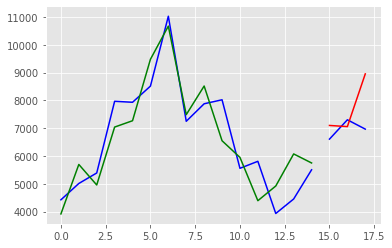

In [154]:
predictions3 = model3.predict(x_test3)
predictions_train3 = model3.predict(x_train3)

print(x_train3.shape)
print(y_train3.shape)
print(x_test3.shape)
print(y_test3.shape)
print(NN_AC_sku25.shape)

x2_3 = numpy.arange(0, 15, 1)
x3_3 = numpy.arange(15, 18, 1)

plt.plot(x2_3, y_train3, color='blue')
plt.plot(x2_3, predictions_train3, color='green')
plt.plot(x3_3, y_test3, color='blue')
plt.plot(x3_3, predictions3, color='red')

# redline - прогноз, greenline - подгонка

In [336]:
print(predictions3)

[[7098.214]
 [7056.79 ]
 [8954.297]]


In [27]:
# -SKU#28-

In [167]:
AC_sku28 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #28')]
AC_sku28.drop('sku_id', axis=1, inplace=True)
#AC_sku28.iloc[:,1].plot()

NN_AC_sku28 = pd.DataFrame()

for i in range(12,0,-1):
    NN_AC_sku28['t-' + str(i)] = AC_sku28.iloc[:,1].shift(i)
    
NN_AC_sku28['t'] = AC_sku28.iloc[:,1].values
#print(NN_AC_sku28.head(13))

new_NN_AC_sku28 = NN_AC_sku28[12:]
#new_NN_AC_sku28.head()

y4 = new_NN_AC_sku28['t']
x4 = new_NN_AC_sku28.drop('t', axis=1)

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train4 = x4[:15]
y_train4 = y4[:15]
x_test4 = x4[15:]
y_test4 = y4[15:]

#print(new_NN_AC_sku28.shape)
#print(x_train4.shape)
#print(y_train4.shape)
#print(x_test4.shape)
#print(y_test4.shape)
#print(x_train4.head(5))

x_train4 = x_train4.values
y_train4 = y_train4.values
x_test4 = x_test4.values
y_test4 = y_test4.values

# NN

model4 = Sequential()
model4.add(Dense(6, input_dim=12, activation='relu'))
model4.add(Dense(1, activation='linear'))
model4.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape'])
model4.fit(x_train4, y_train4, epochs=300, batch_size=None)

Epoch 1/300
15/15 [==============================] - 3s 231ms/step - loss: 835975.0625 - mean_absolute_percentage_error: 28.6723
Epoch 2/300
15/15 [==============================] - 0s 330us/step - loss: 818900.6875 - mean_absolute_percentage_error: 28.7202
Epoch 3/300
15/15 [==============================] - 0s 332us/step - loss: 806111.8750 - mean_absolute_percentage_error: 28.6084
Epoch 4/300
15/15 [==============================] - 0s 332us/step - loss: 794513.4375 - mean_absolute_percentage_error: 28.3987
Epoch 5/300
15/15 [==============================] - 0s 267us/step - loss: 781319.6875 - mean_absolute_percentage_error: 28.1165
Epoch 6/300
15/15 [==============================] - 0s 199us/step - loss: 766690.6250 - mean_absolute_percentage_error: 27.7866
Epoch 7/300
15/15 [==============================] - 0s 332us/step - loss: 751904.3750 - mean_absolute_percentage_error: 27.4305
Epoch 8/300
15/15 [==============================] - 0s 333us/step - loss: 737870.8750 - mean_abs

Epoch 65/300
15/15 [==============================] - 0s 399us/step - loss: 342937.6562 - mean_absolute_percentage_error: 17.2778
Epoch 66/300
15/15 [==============================] - 0s 266us/step - loss: 339307.8438 - mean_absolute_percentage_error: 17.1388
Epoch 67/300
15/15 [==============================] - 0s 266us/step - loss: 335739.8750 - mean_absolute_percentage_error: 16.9987
Epoch 68/300
15/15 [==============================] - 0s 400us/step - loss: 332241.3750 - mean_absolute_percentage_error: 16.8722
Epoch 69/300
15/15 [==============================] - 0s 266us/step - loss: 328786.5938 - mean_absolute_percentage_error: 16.7551
Epoch 70/300
15/15 [==============================] - 0s 199us/step - loss: 325381.0312 - mean_absolute_percentage_error: 16.6346
Epoch 71/300
15/15 [==============================] - 0s 332us/step - loss: 321999.1875 - mean_absolute_percentage_error: 16.5079
Epoch 72/300
15/15 [==============================] - 0s 264us/step - loss: 318735.4688 - 

Epoch 128/300
15/15 [==============================] - 0s 199us/step - loss: 183463.6562 - mean_absolute_percentage_error: 12.0254
Epoch 129/300
15/15 [==============================] - 0s 334us/step - loss: 181632.7188 - mean_absolute_percentage_error: 11.9042
Epoch 130/300
15/15 [==============================] - 0s 468us/step - loss: 179878.6406 - mean_absolute_percentage_error: 11.7975
Epoch 131/300
15/15 [==============================] - 0s 396us/step - loss: 178134.9688 - mean_absolute_percentage_error: 11.7358
Epoch 132/300
15/15 [==============================] - 0s 331us/step - loss: 176354.4844 - mean_absolute_percentage_error: 11.7114
Epoch 133/300
15/15 [==============================] - 0s 332us/step - loss: 174612.2656 - mean_absolute_percentage_error: 11.7123
Epoch 134/300
15/15 [==============================] - 0s 266us/step - loss: 172917.0781 - mean_absolute_percentage_error: 11.6896
Epoch 135/300
15/15 [==============================] - 0s 399us/step - loss: 171209

Epoch 191/300
15/15 [==============================] - 0s 399us/step - loss: 99405.7812 - mean_absolute_percentage_error: 8.7277
Epoch 192/300
15/15 [==============================] - 0s 398us/step - loss: 98433.9297 - mean_absolute_percentage_error: 8.6687
Epoch 193/300
15/15 [==============================] - 0s 266us/step - loss: 97486.8516 - mean_absolute_percentage_error: 8.5863
Epoch 194/300
15/15 [==============================] - 0s 333us/step - loss: 96558.9219 - mean_absolute_percentage_error: 8.5147
Epoch 195/300
15/15 [==============================] - 0s 199us/step - loss: 95598.8906 - mean_absolute_percentage_error: 8.4739
Epoch 196/300
15/15 [==============================] - 0s 265us/step - loss: 94676.5469 - mean_absolute_percentage_error: 8.4401
Epoch 197/300
15/15 [==============================] - 0s 399us/step - loss: 93754.2812 - mean_absolute_percentage_error: 8.4075
Epoch 198/300
15/15 [==============================] - 0s 532us/step - loss: 92858.3516 - mean_ab

Epoch 255/300
15/15 [==============================] - 0s 265us/step - loss: 52515.1875 - mean_absolute_percentage_error: 6.3808
Epoch 256/300
15/15 [==============================] - 0s 266us/step - loss: 51988.2539 - mean_absolute_percentage_error: 6.3654
Epoch 257/300
15/15 [==============================] - 0s 400us/step - loss: 51451.0000 - mean_absolute_percentage_error: 6.3188
Epoch 258/300
15/15 [==============================] - 0s 266us/step - loss: 50914.3750 - mean_absolute_percentage_error: 6.2520
Epoch 259/300
15/15 [==============================] - 0s 532us/step - loss: 50387.9297 - mean_absolute_percentage_error: 6.1860
Epoch 260/300
15/15 [==============================] - 0s 267us/step - loss: 49877.6836 - mean_absolute_percentage_error: 6.1404
Epoch 261/300
15/15 [==============================] - 0s 2ms/step - loss: 49348.6406 - mean_absolute_percentage_error: 6.1287
Epoch 262/300
15/15 [==============================] - 0s 465us/step - loss: 48854.3359 - mean_abso

In [168]:
scores4 = model4.evaluate(x_test4, y_test4)
y_pred4 = model4.predict(x_test4)

def smape(y_test4, y_pred4):
    return 100/len(y_test4) * np.sum(2 * np.abs(y_pred4 - y_test4) / (np.abs(y_test4) + np.abs(y_pred4)))

print(smape(y_test4, y_pred4))
# Подсчитали SMAPE

3/3 [==============================] - 1s 459ms/step
88.27177278527404


(15, 12)
(15,)
(3, 12)
(3,)
(30, 13)


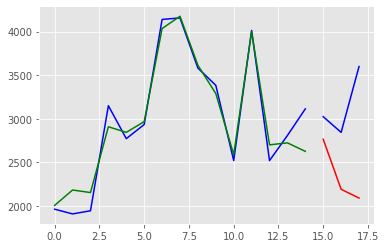

In [169]:
predictions4 = model4.predict(x_test4)
predictions_train4 = model4.predict(x_train4)

print(x_train4.shape)
print(y_train4.shape)
print(x_test4.shape)
print(y_test4.shape)
print(NN_AC_sku28.shape)

x2_4 = numpy.arange(0, 15, 1)
x3_4 = numpy.arange(15, 18, 1)

plt.plot(x2_4, y_train4, color='blue')
plt.plot(x2_4, predictions_train4, color='green')
plt.plot(x3_4, y_test4, color='blue')
plt.plot(x3_4, predictions4, color='red')

# redline - прогноз, greenline - подгонка

In [337]:
print(predictions4)

[[2764.6768]
 [2190.7288]
 [2089.7832]]


In [31]:
# -SKU#30-

In [178]:
AC_sku30 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #30')]
AC_sku30.drop('sku_id', axis=1, inplace=True)
#AC_sku30.iloc[:,1].plot()

NN_AC_sku30 = pd.DataFrame()

for i in range(12,0,-1):
    NN_AC_sku30['t-' + str(i)] = AC_sku30.iloc[:,1].shift(i)
    
NN_AC_sku30['t'] = AC_sku30.iloc[:,1].values
#print(NN_AC_sku30.head(13))

new_NN_AC_sku30 = NN_AC_sku30[12:]
#new_NN_AC_sku30.head()

y5 = new_NN_AC_sku30['t']
x5 = new_NN_AC_sku30.drop('t', axis=1)

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train5 = x5[:15]
y_train5 = y5[:15]
x_test5 = x5[15:]
y_test5 = y5[15:]

#print(new_NN_AC_sku30.shape)
#print(x_train5.shape)
#print(y_train5.shape)
#print(x_test5.shape)
#print(y_test5.shape)
#print(x_train5.head(5))

x_train5 = x_train5.values
y_train5 = y_train5.values
x_test5 = x_test5.values
y_test5 = y_test5.values

# NN

model5 = Sequential()
model5.add(Dense(6, input_dim=12, activation='relu'))
model5.add(Dense(1, activation='linear'))
model5.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape'])
model5.fit(x_train5, y_train5, epochs=300, batch_size=None)

Epoch 1/300
15/15 [==============================] - 4s 252ms/step - loss: 237499424.0000 - mean_absolute_percentage_error: 135.7755
Epoch 2/300
15/15 [==============================] - 0s 198us/step - loss: 229432016.0000 - mean_absolute_percentage_error: 133.4014
Epoch 3/300
15/15 [==============================] - 0s 333us/step - loss: 222754928.0000 - mean_absolute_percentage_error: 131.4198
Epoch 4/300
15/15 [==============================] - 0s 199us/step - loss: 215260464.0000 - mean_absolute_percentage_error: 129.1660
Epoch 5/300
15/15 [==============================] - 0s 268us/step - loss: 207922000.0000 - mean_absolute_percentage_error: 126.9196
Epoch 6/300
15/15 [==============================] - 0s 331us/step - loss: 200737808.0000 - mean_absolute_percentage_error: 124.6809
Epoch 7/300
15/15 [==============================] - 0s 266us/step - loss: 193707536.0000 - mean_absolute_percentage_error: 122.4501
Epoch 8/300
15/15 [==============================] - 0s 465us/step - 

Epoch 63/300
15/15 [==============================] - 0s 266us/step - loss: 14829877.0000 - mean_absolute_percentage_error: 29.4873
Epoch 64/300
15/15 [==============================] - 0s 334us/step - loss: 14102137.0000 - mean_absolute_percentage_error: 28.5646
Epoch 65/300
15/15 [==============================] - 0s 331us/step - loss: 13413103.0000 - mean_absolute_percentage_error: 27.6955
Epoch 66/300
15/15 [==============================] - 0s 199us/step - loss: 12761061.0000 - mean_absolute_percentage_error: 26.8457
Epoch 67/300
15/15 [==============================] - 0s 399us/step - loss: 12144363.0000 - mean_absolute_percentage_error: 26.0149
Epoch 68/300
15/15 [==============================] - 0s 334us/step - loss: 11561426.0000 - mean_absolute_percentage_error: 25.2029
Epoch 69/300
15/15 [==============================] - 0s 264us/step - loss: 11010729.0000 - mean_absolute_percentage_error: 24.4094
Epoch 70/300
15/15 [==============================] - 0s 332us/step - loss: 

Epoch 126/300
15/15 [==============================] - 0s 466us/step - loss: 3072143.2500 - mean_absolute_percentage_error: 14.6862
Epoch 127/300
15/15 [==============================] - 0s 264us/step - loss: 3064980.5000 - mean_absolute_percentage_error: 14.6729
Epoch 128/300
15/15 [==============================] - 0s 266us/step - loss: 3058180.0000 - mean_absolute_percentage_error: 14.6598
Epoch 129/300
15/15 [==============================] - 0s 397us/step - loss: 3051648.7500 - mean_absolute_percentage_error: 14.6466
Epoch 130/300
15/15 [==============================] - 0s 266us/step - loss: 3045378.7500 - mean_absolute_percentage_error: 14.6335
Epoch 131/300
15/15 [==============================] - 0s 2ms/step - loss: 3039331.7500 - mean_absolute_percentage_error: 14.6204
Epoch 132/300
15/15 [==============================] - 0s 399us/step - loss: 3033480.2500 - mean_absolute_percentage_error: 14.6074
Epoch 133/300
15/15 [==============================] - 0s 334us/step - loss: 3

Epoch 189/300
15/15 [==============================] - 0s 397us/step - loss: 2747277.2500 - mean_absolute_percentage_error: 13.8613
Epoch 190/300
15/15 [==============================] - 0s 399us/step - loss: 2742219.7500 - mean_absolute_percentage_error: 13.8477
Epoch 191/300
15/15 [==============================] - 0s 266us/step - loss: 2737161.7500 - mean_absolute_percentage_error: 13.8340
Epoch 192/300
15/15 [==============================] - 0s 266us/step - loss: 2732091.2500 - mean_absolute_percentage_error: 13.8203
Epoch 193/300
15/15 [==============================] - 0s 331us/step - loss: 2727017.0000 - mean_absolute_percentage_error: 13.8066
Epoch 194/300
15/15 [==============================] - 0s 266us/step - loss: 2721955.2500 - mean_absolute_percentage_error: 13.7929
Epoch 195/300
15/15 [==============================] - 0s 399us/step - loss: 2716893.7500 - mean_absolute_percentage_error: 13.7792
Epoch 196/300
15/15 [==============================] - 0s 266us/step - loss:

Epoch 252/300
15/15 [==============================] - 0s 332us/step - loss: 2428346.2500 - mean_absolute_percentage_error: 12.9666
Epoch 253/300
15/15 [==============================] - 0s 332us/step - loss: 2423325.2500 - mean_absolute_percentage_error: 12.9519
Epoch 254/300
15/15 [==============================] - 0s 798us/step - loss: 2418306.2500 - mean_absolute_percentage_error: 12.9372
Epoch 255/300
15/15 [==============================] - 0s 266us/step - loss: 2413302.2500 - mean_absolute_percentage_error: 12.9225
Epoch 256/300
15/15 [==============================] - 0s 266us/step - loss: 2408289.5000 - mean_absolute_percentage_error: 12.9078
Epoch 257/300
15/15 [==============================] - 0s 266us/step - loss: 2403280.2500 - mean_absolute_percentage_error: 12.8931
Epoch 258/300
15/15 [==============================] - 0s 1ms/step - loss: 2398283.5000 - mean_absolute_percentage_error: 12.8784
Epoch 259/300
15/15 [==============================] - 0s 266us/step - loss: 2

In [179]:
scores5 = model5.evaluate(x_test5, y_test5)
y_pred5 = model5.predict(x_test5)

def smape(y_test5, y_pred5):
    return 100/len(y_test5) * np.sum(2 * np.abs(y_pred5 - y_test5) / (np.abs(y_test5) + np.abs(y_pred5)))

print(smape(y_test5, y_pred5))
# Подсчитали SMAPE

3/3 [==============================] - 1s 498ms/step
103.49620595679039


(15, 12)
(15,)
(3, 12)
(3,)
(30, 13)


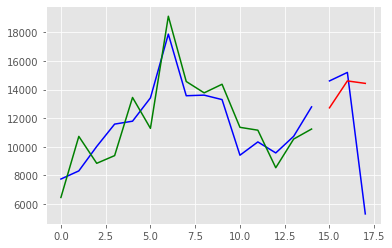

In [180]:
predictions5 = model5.predict(x_test5)
predictions_train5 = model5.predict(x_train5)

print(x_train5.shape)
print(y_train5.shape)
print(x_test5.shape)
print(y_test5.shape)
print(NN_AC_sku30.shape)

x2_5 = numpy.arange(0, 15, 1)
x3_5 = numpy.arange(15, 18, 1)

plt.plot(x2_5, y_train5, color='blue')
plt.plot(x2_5, predictions_train5, color='green')
plt.plot(x3_5, y_test5, color='blue')
plt.plot(x3_5, predictions5, color='red')

# redline - прогноз, greenline - подгонка

In [338]:
print(predictions5)

[[12725.17 ]
 [14608.563]
 [14437.164]]


In [35]:
# -SKU#31-

In [188]:
AC_sku31 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #31')]
AC_sku31.drop('sku_id', axis=1, inplace=True)
#AC_sku31.iloc[:,1].plot()

NN_AC_sku31 = pd.DataFrame()

for i in range(12,0,-1):
    NN_AC_sku31['t-' + str(i)] = AC_sku31.iloc[:,1].shift(i)
    
NN_AC_sku31['t'] = AC_sku31.iloc[:,1].values
#print(NN_AC_sku31.head(13))

new_NN_AC_sku31 = NN_AC_sku31[12:]
#new_NN_AC_sku31.head()

y6 = new_NN_AC_sku31['t']
x6 = new_NN_AC_sku31.drop('t', axis=1)

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train6 = x6[:15]
y_train6 = y6[:15]
x_test6 = x6[15:]
y_test6 = y6[15:]

#print(new_NN_AC_sku31.shape)
#print(x_train6.shape)
#print(y_train6.shape)
#print(x_test6.shape)
#print(y_test6.shape)
#print(x_train6.head(5))

x_train6 = x_train6.values
y_train6 = y_train6.values
x_test6 = x_test6.values
y_test6 = y_test6.values

# NN

model6 = Sequential()
model6.add(Dense(6, input_dim=12, activation='relu'))
model6.add(Dense(1, activation='linear'))
model6.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape'])
model6.fit(x_train6, y_train6, epochs=300, batch_size=None)

Epoch 1/300
15/15 [==============================] - 4s 268ms/step - loss: 347992.7812 - mean_absolute_percentage_error: 26.3617
Epoch 2/300
15/15 [==============================] - 0s 199us/step - loss: 344852.9375 - mean_absolute_percentage_error: 26.1577
Epoch 3/300
15/15 [==============================] - 0s 264us/step - loss: 341625.0625 - mean_absolute_percentage_error: 25.9887
Epoch 4/300
15/15 [==============================] - 0s 265us/step - loss: 338627.6562 - mean_absolute_percentage_error: 25.8136
Epoch 5/300
15/15 [==============================] - 0s 332us/step - loss: 335927.8125 - mean_absolute_percentage_error: 25.6389
Epoch 6/300
15/15 [==============================] - 0s 199us/step - loss: 333493.1250 - mean_absolute_percentage_error: 25.4693
Epoch 7/300
15/15 [==============================] - 0s 333us/step - loss: 331259.9062 - mean_absolute_percentage_error: 25.3076
Epoch 8/300
15/15 [==============================] - 0s 266us/step - loss: 329161.5000 - mean_abs

Epoch 65/300
15/15 [==============================] - 0s 331us/step - loss: 227051.4219 - mean_absolute_percentage_error: 20.5682
Epoch 66/300
15/15 [==============================] - 0s 332us/step - loss: 225498.0312 - mean_absolute_percentage_error: 20.4857
Epoch 67/300
15/15 [==============================] - 0s 399us/step - loss: 223962.6406 - mean_absolute_percentage_error: 20.3983
Epoch 68/300
15/15 [==============================] - 0s 532us/step - loss: 222441.0312 - mean_absolute_percentage_error: 20.3147
Epoch 69/300
15/15 [==============================] - 0s 266us/step - loss: 220920.0625 - mean_absolute_percentage_error: 20.2339
Epoch 70/300
15/15 [==============================] - 0s 265us/step - loss: 219401.0312 - mean_absolute_percentage_error: 20.1556
Epoch 71/300
15/15 [==============================] - 0s 266us/step - loss: 217918.8906 - mean_absolute_percentage_error: 20.0815
Epoch 72/300
15/15 [==============================] - 0s 198us/step - loss: 216434.0625 - 

Epoch 128/300
15/15 [==============================] - 0s 332us/step - loss: 152416.7344 - mean_absolute_percentage_error: 16.2664
Epoch 129/300
15/15 [==============================] - 0s 332us/step - loss: 151632.7031 - mean_absolute_percentage_error: 16.2171
Epoch 130/300
15/15 [==============================] - 0s 266us/step - loss: 150905.7812 - mean_absolute_percentage_error: 16.1716
Epoch 131/300
15/15 [==============================] - 0s 865us/step - loss: 150173.1875 - mean_absolute_percentage_error: 16.1257
Epoch 132/300
15/15 [==============================] - 0s 266us/step - loss: 149432.2344 - mean_absolute_percentage_error: 16.0792
Epoch 133/300
15/15 [==============================] - 0s 266us/step - loss: 148692.3125 - mean_absolute_percentage_error: 16.0325
Epoch 134/300
15/15 [==============================] - 0s 534us/step - loss: 147996.6562 - mean_absolute_percentage_error: 15.9896
Epoch 135/300
15/15 [==============================] - 0s 332us/step - loss: 147319

Epoch 191/300
15/15 [==============================] - 0s 399us/step - loss: 123757.3047 - mean_absolute_percentage_error: 14.4313
Epoch 192/300
15/15 [==============================] - 0s 266us/step - loss: 123529.0156 - mean_absolute_percentage_error: 14.4057
Epoch 193/300
15/15 [==============================] - 0s 266us/step - loss: 123294.3984 - mean_absolute_percentage_error: 14.3837
Epoch 194/300
15/15 [==============================] - 0s 332us/step - loss: 123072.5234 - mean_absolute_percentage_error: 14.3673
Epoch 195/300
15/15 [==============================] - 0s 266us/step - loss: 122855.9609 - mean_absolute_percentage_error: 14.3500
Epoch 196/300
15/15 [==============================] - 0s 465us/step - loss: 122640.8828 - mean_absolute_percentage_error: 14.3311
Epoch 197/300
15/15 [==============================] - 0s 266us/step - loss: 122425.8516 - mean_absolute_percentage_error: 14.3105
Epoch 198/300
15/15 [==============================] - 0s 1ms/step - loss: 122211.7

Epoch 254/300
15/15 [==============================] - 0s 332us/step - loss: 113069.7188 - mean_absolute_percentage_error: 13.3866
Epoch 255/300
15/15 [==============================] - 0s 399us/step - loss: 112929.8594 - mean_absolute_percentage_error: 13.3764
Epoch 256/300
15/15 [==============================] - 0s 333us/step - loss: 112790.4688 - mean_absolute_percentage_error: 13.3668
Epoch 257/300
15/15 [==============================] - 0s 332us/step - loss: 112651.9844 - mean_absolute_percentage_error: 13.3574
Epoch 258/300
15/15 [==============================] - 0s 399us/step - loss: 112514.5781 - mean_absolute_percentage_error: 13.3477
Epoch 259/300
15/15 [==============================] - 0s 332us/step - loss: 112377.6953 - mean_absolute_percentage_error: 13.3374
Epoch 260/300
15/15 [==============================] - 0s 400us/step - loss: 112241.0469 - mean_absolute_percentage_error: 13.3262
Epoch 261/300
15/15 [==============================] - 0s 266us/step - loss: 112104

In [189]:
scores6 = model6.evaluate(x_test6, y_test6)
y_pred6 = model6.predict(x_test6)

def smape(y_test6, y_pred6):
    return 100/len(y_test6) * np.sum(2 * np.abs(y_pred6 - y_test6) / (np.abs(y_test6) + np.abs(y_pred6)))

print(smape(y_test6, y_pred6))
# Подсчитали SMAPE

3/3 [==============================] - 2s 574ms/step
345.8513282903613


(15, 12)
(15,)
(3, 12)
(3,)
(30, 13)


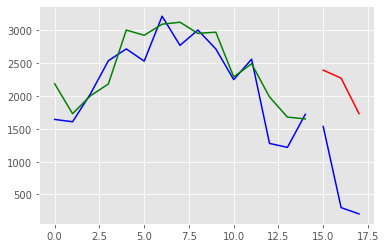

In [190]:
predictions6 = model6.predict(x_test6)
predictions_train6 = model5.predict(x_train6)

print(x_train6.shape)
print(y_train6.shape)
print(x_test6.shape)
print(y_test6.shape)
print(NN_AC_sku31.shape)

x2_6 = numpy.arange(0, 15, 1)
x3_6 = numpy.arange(15, 18, 1)

plt.plot(x2_6, y_train6, color='blue')
plt.plot(x2_6, predictions_train6, color='green')
plt.plot(x3_6, y_test6, color='blue')
plt.plot(x3_6, predictions6, color='red')

# redline - прогноз, greenline - подгонка

In [339]:
print(predictions6)

[[2394.675 ]
 [2272.3257]
 [1731.4266]]


In [39]:
# -SKU#33-

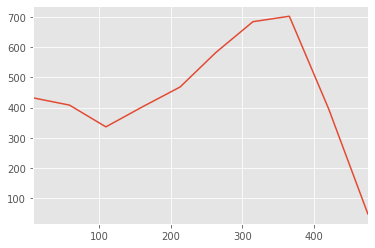

In [40]:
AC_sku33 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #33')]
AC_sku33.drop('sku_id', axis=1, inplace=True)
AC_sku33.iloc[:,1].plot()
# ВЫХОДИТ ИЗ ПРОДАЖ ПОСЛЕ 2017

In [41]:
# -SKU#38-

In [210]:
AC_sku38 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #38')]
AC_sku38.drop('sku_id', axis=1, inplace=True)
#AC_sku38.iloc[:,1].plot()

NN_AC_sku38 = pd.DataFrame()

for i in range(12,0,-1):
    NN_AC_sku38['t-' + str(i)] = AC_sku38.iloc[:,1].shift(i)
    
NN_AC_sku38['t'] = AC_sku38.iloc[:,1].values
#print(NN_AC_sku38.head(13))

new_NN_AC_sku38 = NN_AC_sku38[12:]
#new_NN_AC_sku38.head()

y7 = new_NN_AC_sku38['t']
x7 = new_NN_AC_sku38.drop('t', axis=1)

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train7 = x7[:15]
y_train7 = y7[:15]
x_test7 = x7[15:]
y_test7 = y7[15:]

#print(new_NN_AC_sku38.shape)
#print(x_train7.shape)
#print(y_train7.shape)
#print(x_test7.shape)
#print(y_test7.shape)
#print(x_train7.head(5))

x_train7 = x_train7.values
y_train7 = y_train7.values
x_test7 = x_test7.values
y_test7 = y_test7.values

# NN

model7 = Sequential()
model7.add(Dense(6, input_dim=12, activation='relu'))
model7.add(Dense(1, activation='linear'))
model7.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape'])
model7.fit(x_train7, y_train7, epochs=300, batch_size=None)

Epoch 1/300
15/15 [==============================] - 5s 302ms/step - loss: 315107.4688 - mean_absolute_percentage_error: 31.4940
Epoch 2/300
15/15 [==============================] - 0s 266us/step - loss: 295817.9688 - mean_absolute_percentage_error: 30.3109
Epoch 3/300
15/15 [==============================] - 0s 332us/step - loss: 272516.6875 - mean_absolute_percentage_error: 28.9335
Epoch 4/300
15/15 [==============================] - 0s 332us/step - loss: 252270.1719 - mean_absolute_percentage_error: 27.7665
Epoch 5/300
15/15 [==============================] - 0s 266us/step - loss: 235086.4375 - mean_absolute_percentage_error: 26.6203
Epoch 6/300
15/15 [==============================] - 0s 266us/step - loss: 221478.1562 - mean_absolute_percentage_error: 25.5439
Epoch 7/300
15/15 [==============================] - 0s 532us/step - loss: 210120.9844 - mean_absolute_percentage_error: 24.4429
Epoch 8/300
15/15 [==============================] - 0s 731us/step - loss: 201538.8125 - mean_abs

Epoch 65/300
15/15 [==============================] - 0s 532us/step - loss: 138095.4688 - mean_absolute_percentage_error: 18.4189
Epoch 66/300
15/15 [==============================] - 0s 266us/step - loss: 137136.3750 - mean_absolute_percentage_error: 18.3812
Epoch 67/300
15/15 [==============================] - 0s 266us/step - loss: 136189.1719 - mean_absolute_percentage_error: 18.3424
Epoch 68/300
15/15 [==============================] - 0s 532us/step - loss: 135251.7969 - mean_absolute_percentage_error: 18.3022
Epoch 69/300
15/15 [==============================] - 0s 332us/step - loss: 134321.9844 - mean_absolute_percentage_error: 18.2606
Epoch 70/300
15/15 [==============================] - 0s 399us/step - loss: 133397.6719 - mean_absolute_percentage_error: 18.2173
Epoch 71/300
15/15 [==============================] - 0s 266us/step - loss: 132477.2500 - mean_absolute_percentage_error: 18.1724
Epoch 72/300
15/15 [==============================] - 0s 266us/step - loss: 131559.7656 - 

Epoch 128/300
15/15 [==============================] - 0s 399us/step - loss: 91055.0859 - mean_absolute_percentage_error: 15.6980
Epoch 129/300
15/15 [==============================] - 0s 399us/step - loss: 90532.6484 - mean_absolute_percentage_error: 15.6603
Epoch 130/300
15/15 [==============================] - 0s 532us/step - loss: 90016.6484 - mean_absolute_percentage_error: 15.6225
Epoch 131/300
15/15 [==============================] - 0s 266us/step - loss: 89506.9844 - mean_absolute_percentage_error: 15.5845
Epoch 132/300
15/15 [==============================] - 0s 399us/step - loss: 89003.5859 - mean_absolute_percentage_error: 15.5464
Epoch 133/300
15/15 [==============================] - 0s 465us/step - loss: 88506.5234 - mean_absolute_percentage_error: 15.5082
Epoch 134/300
15/15 [==============================] - 0s 266us/step - loss: 88015.6250 - mean_absolute_percentage_error: 15.4700
Epoch 135/300
15/15 [==============================] - 0s 532us/step - loss: 87530.9453 - 

Epoch 192/300
15/15 [==============================] - 0s 333us/step - loss: 68097.1094 - mean_absolute_percentage_error: 13.5602
Epoch 193/300
15/15 [==============================] - 0s 399us/step - loss: 67865.3203 - mean_absolute_percentage_error: 13.5320
Epoch 194/300
15/15 [==============================] - 0s 463us/step - loss: 67636.8125 - mean_absolute_percentage_error: 13.5041
Epoch 195/300
15/15 [==============================] - 0s 400us/step - loss: 67410.8750 - mean_absolute_percentage_error: 13.4763
Epoch 196/300
15/15 [==============================] - 0s 399us/step - loss: 67187.5234 - mean_absolute_percentage_error: 13.4487
Epoch 197/300
15/15 [==============================] - 0s 333us/step - loss: 66966.7578 - mean_absolute_percentage_error: 13.4213
Epoch 198/300
15/15 [==============================] - 0s 465us/step - loss: 66748.4453 - mean_absolute_percentage_error: 13.3940
Epoch 199/300
15/15 [==============================] - 0s 266us/step - loss: 66532.6562 - 

Epoch 256/300
15/15 [==============================] - 0s 399us/step - loss: 57100.8828 - mean_absolute_percentage_error: 12.1257
Epoch 257/300
15/15 [==============================] - 0s 266us/step - loss: 56970.0977 - mean_absolute_percentage_error: 12.1064
Epoch 258/300
15/15 [==============================] - 0s 399us/step - loss: 56840.0430 - mean_absolute_percentage_error: 12.0872
Epoch 259/300
15/15 [==============================] - 0s 533us/step - loss: 56710.7891 - mean_absolute_percentage_error: 12.0680
Epoch 260/300
15/15 [==============================] - 0s 332us/step - loss: 56582.2852 - mean_absolute_percentage_error: 12.0490
Epoch 261/300
15/15 [==============================] - 0s 465us/step - loss: 56454.5898 - mean_absolute_percentage_error: 12.0300
Epoch 262/300
15/15 [==============================] - 0s 398us/step - loss: 56327.5820 - mean_absolute_percentage_error: 12.0111
Epoch 263/300
15/15 [==============================] - 0s 333us/step - loss: 56201.3516 - 

In [211]:
scores7 = model7.evaluate(x_test7, y_test7)
y_pred7 = model7.predict(x_test7)

def smape(y_test7, y_pred7):
    return 100/len(y_test7) * np.sum(2 * np.abs(y_pred7 - y_test7) / (np.abs(y_test7) + np.abs(y_pred7)))

print(smape(y_test7, y_pred7))
# Подсчитали SMAPE

3/3 [==============================] - 2s 616ms/step
86.20615794156944


(15, 12)
(15,)
(3, 12)
(3,)
(30, 13)


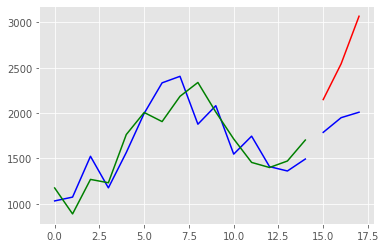

In [212]:
predictions7 = model7.predict(x_test7)
predictions_train7 = model7.predict(x_train7)

print(x_train7.shape)
print(y_train7.shape)
print(x_test7.shape)
print(y_test7.shape)
print(NN_AC_sku38.shape)

x2_7 = numpy.arange(0, 15, 1)
x3_7 = numpy.arange(15, 18, 1)

plt.plot(x2_7, y_train7, color='blue')
plt.plot(x2_7, predictions_train7, color='green')
plt.plot(x3_7, y_test7, color='blue')
plt.plot(x3_7, predictions7, color='red')

# redline - прогноз, greenline - подгонка

In [340]:
print(predictions7)

[[2149.69  ]
 [2544.0405]
 [3068.5085]]


In [45]:
# -SKU#41-

In [236]:
AC_sku41 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #41')]
AC_sku41.drop('sku_id', axis=1, inplace=True)
#AC_sku41.iloc[:,1].plot()

NN_AC_sku41 = pd.DataFrame()

for i in range(12,0,-1):
    NN_AC_sku41['t-' + str(i)] = AC_sku41.iloc[:,1].shift(i)
    
NN_AC_sku41['t'] = AC_sku41.iloc[:,1].values
#print(NN_AC_sku41.head(13))

new_NN_AC_sku41 = NN_AC_sku41[12:]
#new_NN_AC_sku41.head()

y8 = new_NN_AC_sku41['t']
x8 = new_NN_AC_sku41.drop('t', axis=1)

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train8 = x8[:15]
y_train8 = y8[:15]
x_test8 = x8[15:]
y_test8 = y8[15:]

#print(new_NN_AC_sku41.shape)
#print(x_train8.shape)
#print(y_train8.shape)
#print(x_test8.shape)
#print(y_test8.shape)
#print(x_train8.head(5))

x_train8 = x_train8.values
y_train8 = y_train8.values
x_test8 = x_test8.values
y_test8 = y_test8.values

# NN

model8 = Sequential()
model8.add(Dense(6, input_dim=12, activation='relu'))
model8.add(Dense(1, activation='linear'))
model8.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape'])
model8.fit(x_train8, y_train8, epochs=300, batch_size=None)

Epoch 1/300
15/15 [==============================] - 5s 363ms/step - loss: 2065099.8750 - mean_absolute_percentage_error: 296.0889
Epoch 2/300
15/15 [==============================] - 0s 332us/step - loss: 2016992.0000 - mean_absolute_percentage_error: 295.9531
Epoch 3/300
15/15 [==============================] - 0s 666us/step - loss: 1963279.1250 - mean_absolute_percentage_error: 295.7955
Epoch 4/300
15/15 [==============================] - 0s 532us/step - loss: 1909058.1250 - mean_absolute_percentage_error: 295.6410
Epoch 5/300
15/15 [==============================] - 0s 465us/step - loss: 1856453.3750 - mean_absolute_percentage_error: 295.4877
Epoch 6/300
15/15 [==============================] - 0s 532us/step - loss: 1805254.1250 - mean_absolute_percentage_error: 295.2588
Epoch 7/300
15/15 [==============================] - 0s 332us/step - loss: 1755804.2500 - mean_absolute_percentage_error: 294.9207
Epoch 8/300
15/15 [==============================] - 0s 465us/step - loss: 1706205.

Epoch 64/300
15/15 [==============================] - 0s 331us/step - loss: 492558.4062 - mean_absolute_percentage_error: 156.1846
Epoch 65/300
15/15 [==============================] - 0s 532us/step - loss: 485986.0625 - mean_absolute_percentage_error: 155.3483
Epoch 66/300
15/15 [==============================] - 0s 332us/step - loss: 479214.8438 - mean_absolute_percentage_error: 154.5583
Epoch 67/300
15/15 [==============================] - 0s 332us/step - loss: 472312.5312 - mean_absolute_percentage_error: 153.7737
Epoch 68/300
15/15 [==============================] - 0s 465us/step - loss: 465341.8750 - mean_absolute_percentage_error: 152.9942
Epoch 69/300
15/15 [==============================] - 0s 333us/step - loss: 458359.5000 - mean_absolute_percentage_error: 152.2190
Epoch 70/300
15/15 [==============================] - 0s 332us/step - loss: 451415.6562 - mean_absolute_percentage_error: 151.4476
Epoch 71/300
15/15 [==============================] - 0s 398us/step - loss: 444553.

Epoch 127/300
15/15 [==============================] - 0s 399us/step - loss: 253130.7500 - mean_absolute_percentage_error: 117.5647
Epoch 128/300
15/15 [==============================] - 0s 465us/step - loss: 251202.4844 - mean_absolute_percentage_error: 117.1494
Epoch 129/300
15/15 [==============================] - 0s 399us/step - loss: 249301.7188 - mean_absolute_percentage_error: 116.7377
Epoch 130/300
15/15 [==============================] - 0s 398us/step - loss: 247427.7500 - mean_absolute_percentage_error: 116.3295
Epoch 131/300
15/15 [==============================] - 0s 332us/step - loss: 245573.4062 - mean_absolute_percentage_error: 115.9235
Epoch 132/300
15/15 [==============================] - 0s 1ms/step - loss: 243751.5469 - mean_absolute_percentage_error: 115.5224
Epoch 133/300
15/15 [==============================] - 0s 399us/step - loss: 241954.6562 - mean_absolute_percentage_error: 115.1248
Epoch 134/300
15/15 [==============================] - 0s 598us/step - loss: 2

Epoch 190/300
15/15 [==============================] - 0s 266us/step - loss: 169560.0000 - mean_absolute_percentage_error: 97.7064
Epoch 191/300
15/15 [==============================] - 0s 465us/step - loss: 168687.4688 - mean_absolute_percentage_error: 97.4708
Epoch 192/300
15/15 [==============================] - 0s 399us/step - loss: 167825.1562 - mean_absolute_percentage_error: 97.2368
Epoch 193/300
15/15 [==============================] - 0s 533us/step - loss: 166972.8281 - mean_absolute_percentage_error: 97.0046
Epoch 194/300
15/15 [==============================] - 0s 266us/step - loss: 166128.3594 - mean_absolute_percentage_error: 96.7734
Epoch 195/300
15/15 [==============================] - 0s 465us/step - loss: 165295.5938 - mean_absolute_percentage_error: 96.5444
Epoch 196/300
15/15 [==============================] - 0s 399us/step - loss: 164472.4688 - mean_absolute_percentage_error: 96.3169
Epoch 197/300
15/15 [==============================] - 0s 399us/step - loss: 163656

Epoch 253/300
15/15 [==============================] - 0s 332us/step - loss: 129501.4688 - mean_absolute_percentage_error: 85.4093
Epoch 254/300
15/15 [==============================] - 0s 332us/step - loss: 129043.9453 - mean_absolute_percentage_error: 85.2457
Epoch 255/300
15/15 [==============================] - 0s 268us/step - loss: 128589.6250 - mean_absolute_percentage_error: 85.0825
Epoch 256/300
15/15 [==============================] - 0s 266us/step - loss: 128139.8594 - mean_absolute_percentage_error: 84.9202
Epoch 257/300
15/15 [==============================] - 0s 333us/step - loss: 127693.9844 - mean_absolute_percentage_error: 84.7586
Epoch 258/300
15/15 [==============================] - 0s 332us/step - loss: 127250.9297 - mean_absolute_percentage_error: 84.5974
Epoch 259/300
15/15 [==============================] - 0s 332us/step - loss: 126811.6250 - mean_absolute_percentage_error: 84.4369
Epoch 260/300
15/15 [==============================] - 0s 866us/step - loss: 126376

In [237]:
scores8 = model8.evaluate(x_test8, y_test8)
y_pred8 = model8.predict(x_test8)

def smape(y_test8, y_pred8):
    return 100/len(y_test8) * np.sum(2 * np.abs(y_pred8 - y_test8) / (np.abs(y_test8) + np.abs(y_pred8)))

print(smape(y_test8, y_pred8))
# Подсчитали SMAPE

3/3 [==============================] - 2s 776ms/step
130.13622704378633


(15, 12)
(15,)
(3, 12)
(3,)
(30, 13)


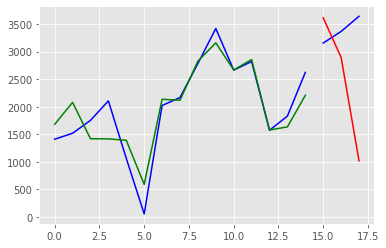

In [238]:
predictions8 = model8.predict(x_test8)
predictions_train8 = model8.predict(x_train8)

print(x_train8.shape)
print(y_train8.shape)
print(x_test8.shape)
print(y_test8.shape)
print(NN_AC_sku41.shape)

x2_8 = numpy.arange(0, 15, 1)
x3_8 = numpy.arange(15, 18, 1)

plt.plot(x2_8, y_train8, color='blue')
plt.plot(x2_8, predictions_train8, color='green')
plt.plot(x3_8, y_test8, color='blue')
plt.plot(x3_8, predictions8, color='red')

# redline - прогноз, greenline - подгонка

In [341]:
print(predictions8)

[[3614.0112]
 [2893.353 ]
 [1017.4012]]


In [49]:
# -SKU#42-

In [275]:
AC_sku42 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #42')]
AC_sku42.drop('sku_id', axis=1, inplace=True)
#AC_sku42.iloc[:,1].plot()

NN_AC_sku42 = pd.DataFrame()

for i in range(12,0,-1):
    NN_AC_sku42['t-' + str(i)] = AC_sku42.iloc[:,1].shift(i)
    
NN_AC_sku42['t'] = AC_sku42.iloc[:,1].values
#print(NN_AC_sku42.head(13))

new_NN_AC_sku42 = NN_AC_sku42[12:]
#new_NN_AC_sku42.head()

y9 = new_NN_AC_sku42['t']
x9 = new_NN_AC_sku42.drop('t', axis=1)

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train9 = x9[:13]
y_train9 = y9[:13]
x_test9 = x9[13:]
y_test9 = y9[13:]

#print(new_NN_AC_sku42.shape)
#print(x_train9.shape)
#print(y_train9.shape)
#print(x_test9.shape)
#print(y_test9.shape)
#print(x_train9.head(5))

x_train9 = x_train9.values
y_train9 = y_train9.values
x_test9 = x_test9.values
y_test9 = y_test9.values

# NN

model9 = Sequential()
model9.add(Dense(6, input_dim=12, activation='relu'))
model9.add(Dense(1, activation='linear'))
model9.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape'])
model9.fit(x_train9, y_train9, epochs=300, batch_size=None)

Epoch 1/300
13/13 [==============================] - 6s 498ms/step - loss: 20075.2754 - mean_absolute_percentage_error: 38.7713
Epoch 2/300
13/13 [==============================] - 0s 305us/step - loss: 19466.6836 - mean_absolute_percentage_error: 39.1273
Epoch 3/300
13/13 [==============================] - 0s 537us/step - loss: 18944.5586 - mean_absolute_percentage_error: 39.5312
Epoch 4/300
13/13 [==============================] - 0s 460us/step - loss: 18595.1914 - mean_absolute_percentage_error: 40.2337
Epoch 5/300
13/13 [==============================] - 0s 460us/step - loss: 18423.2070 - mean_absolute_percentage_error: 40.9272
Epoch 6/300
13/13 [==============================] - 0s 690us/step - loss: 18377.3711 - mean_absolute_percentage_error: 41.7331
Epoch 7/300
13/13 [==============================] - 0s 460us/step - loss: 18379.6445 - mean_absolute_percentage_error: 42.3304
Epoch 8/300
13/13 [==============================] - 0s 537us/step - loss: 18367.1484 - mean_absolute_pe

Epoch 65/300
13/13 [==============================] - 0s 615us/step - loss: 11850.9229 - mean_absolute_percentage_error: 33.4775
Epoch 66/300
13/13 [==============================] - 0s 691us/step - loss: 11769.8174 - mean_absolute_percentage_error: 33.3482
Epoch 67/300
13/13 [==============================] - 0s 844us/step - loss: 11689.5557 - mean_absolute_percentage_error: 33.2205
Epoch 68/300
13/13 [==============================] - 0s 385us/step - loss: 11610.1143 - mean_absolute_percentage_error: 33.0949
Epoch 69/300
13/13 [==============================] - 0s 767us/step - loss: 11532.0459 - mean_absolute_percentage_error: 32.9724
Epoch 70/300
13/13 [==============================] - 0s 381us/step - loss: 11454.2461 - mean_absolute_percentage_error: 32.8512
Epoch 71/300
13/13 [==============================] - 0s 614us/step - loss: 11377.2803 - mean_absolute_percentage_error: 32.7321
Epoch 72/300
13/13 [==============================] - 0s 3ms/step - loss: 11301.1602 - mean_absol

Epoch 129/300
13/13 [==============================] - 0s 614us/step - loss: 8196.2793 - mean_absolute_percentage_error: 26.8016
Epoch 130/300
13/13 [==============================] - 0s 537us/step - loss: 8156.7993 - mean_absolute_percentage_error: 26.7133
Epoch 131/300
13/13 [==============================] - 0s 384us/step - loss: 8117.6582 - mean_absolute_percentage_error: 26.6253
Epoch 132/300
13/13 [==============================] - 0s 843us/step - loss: 8079.2163 - mean_absolute_percentage_error: 26.5401
Epoch 133/300
13/13 [==============================] - 0s 461us/step - loss: 8040.9707 - mean_absolute_percentage_error: 26.4564
Epoch 134/300
13/13 [==============================] - 0s 537us/step - loss: 8002.8979 - mean_absolute_percentage_error: 26.3735
Epoch 135/300
13/13 [==============================] - 0s 614us/step - loss: 7965.0200 - mean_absolute_percentage_error: 26.2914
Epoch 136/300
13/13 [==============================] - 0s 613us/step - loss: 7927.6895 - mean_abs

Epoch 193/300
13/13 [==============================] - 0s 690us/step - loss: 6205.9238 - mean_absolute_percentage_error: 22.4555
Epoch 194/300
13/13 [==============================] - 0s 384us/step - loss: 6181.2900 - mean_absolute_percentage_error: 22.4052
Epoch 195/300
13/13 [==============================] - 0s 307us/step - loss: 6156.8081 - mean_absolute_percentage_error: 22.3553
Epoch 196/300
13/13 [==============================] - 0s 537us/step - loss: 6132.4766 - mean_absolute_percentage_error: 22.3056
Epoch 197/300
13/13 [==============================] - 0s 537us/step - loss: 6108.2974 - mean_absolute_percentage_error: 22.2559
Epoch 198/300
13/13 [==============================] - 0s 537us/step - loss: 6084.2666 - mean_absolute_percentage_error: 22.2064
Epoch 199/300
13/13 [==============================] - 0s 614us/step - loss: 6060.3755 - mean_absolute_percentage_error: 22.1567
Epoch 200/300
13/13 [==============================] - 0s 769us/step - loss: 6036.6382 - mean_abs

Epoch 257/300
13/13 [==============================] - 0s 537us/step - loss: 4892.1074 - mean_absolute_percentage_error: 19.4156
Epoch 258/300
13/13 [==============================] - 0s 536us/step - loss: 4875.2705 - mean_absolute_percentage_error: 19.3709
Epoch 259/300
13/13 [==============================] - 0s 690us/step - loss: 4858.5073 - mean_absolute_percentage_error: 19.3262
Epoch 260/300
13/13 [==============================] - 0s 460us/step - loss: 4841.8369 - mean_absolute_percentage_error: 19.2816
Epoch 261/300
13/13 [==============================] - 0s 921us/step - loss: 4825.2988 - mean_absolute_percentage_error: 19.2371
Epoch 262/300
13/13 [==============================] - 0s 614us/step - loss: 4808.8555 - mean_absolute_percentage_error: 19.1928
Epoch 263/300
13/13 [==============================] - 0s 460us/step - loss: 4792.5132 - mean_absolute_percentage_error: 19.1485
Epoch 264/300
13/13 [==============================] - 0s 616us/step - loss: 4776.2378 - mean_abs

In [276]:
scores9 = model9.evaluate(x_test9, y_test9)
y_pred9 = model9.predict(x_test9)

def smape(y_test9, y_pred9):
    return 100/len(y_test9) * np.sum(2 * np.abs(y_pred9 - y_test9) / (np.abs(y_test9) + np.abs(y_pred9)))

print(smape(y_test9, y_pred9))
# Подсчитали SMAPE

3/3 [==============================] - 3s 859ms/step
495.15960901840276


(13, 12)
(13,)
(3, 12)
(3,)
(28, 13)


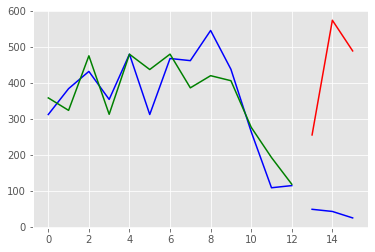

In [277]:
predictions9 = model9.predict(x_test9)
predictions_train9 = model9.predict(x_train9)

print(x_train9.shape)
print(y_train9.shape)
print(x_test9.shape)
print(y_test9.shape)
print(NN_AC_sku42.shape)

x2_9 = numpy.arange(0, 13, 1)
x3_9 = numpy.arange(13, 16, 1)

plt.plot(x2_9, y_train9, color='blue')
plt.plot(x2_9, predictions_train9, color='green')
plt.plot(x3_9, y_test9, color='blue')
plt.plot(x3_9, predictions9, color='red')

# redline - прогноз, greenline - подгонка

In [342]:
print(predictions9)

[[255.08353]
 [574.50336]
 [489.09528]]


In [53]:
# -SKU#46-

In [314]:
AC_sku46 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #46')]
AC_sku46.drop('sku_id', axis=1, inplace=True)
#AC_sku46.iloc[:,1].plot()

NN_AC_sku46 = pd.DataFrame()

for i in range(12,0,-1):
    NN_AC_sku46['t-' + str(i)] = AC_sku46.iloc[:,1].shift(i)
    
NN_AC_sku46['t'] = AC_sku46.iloc[:,1].values
#print(NN_AC_sku46.head(13))

new_NN_AC_sku46 = NN_AC_sku46[12:]
#new_NN_AC_sku46.head()

y10 = new_NN_AC_sku46['t']
x10 = new_NN_AC_sku46.drop('t', axis=1)

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train10 = x10[:15]
y_train10 = y10[:15]
x_test10 = x10[15:]
y_test10 = y10[15:]

#print(new_NN_AC_sku46.shape)
#print(x_train10.shape)
#print(y_train10.shape)
#print(x_test10.shape)
#print(y_test10.shape)
#print(x_train10.head(5))

x_train10 = x_train10.values
y_train10 = y_train10.values
x_test10 = x_test10.values
y_test10 = y_test10.values

# NN

model10 = Sequential()
model10.add(Dense(6, input_dim=12, activation='relu'))
model10.add(Dense(1, activation='linear'))
model10.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape'])
model10.fit(x_train10, y_train10, epochs=300, batch_size=None)

Epoch 1/300
15/15 [==============================] - 8s 527ms/step - loss: 8616263.0000 - mean_absolute_percentage_error: 92.8976
Epoch 2/300
15/15 [==============================] - 0s 399us/step - loss: 8483178.0000 - mean_absolute_percentage_error: 92.2040
Epoch 3/300
15/15 [==============================] - 0s 1ms/step - loss: 8346398.5000 - mean_absolute_percentage_error: 91.4933
Epoch 4/300
15/15 [==============================] - 0s 798us/step - loss: 8202573.0000 - mean_absolute_percentage_error: 90.7532
Epoch 5/300
15/15 [==============================] - 0s 798us/step - loss: 8060237.0000 - mean_absolute_percentage_error: 90.0129
Epoch 6/300
15/15 [==============================] - 0s 346us/step - loss: 7907493.0000 - mean_absolute_percentage_error: 89.2384
Epoch 7/300
15/15 [==============================] - 0s 956us/step - loss: 7748118.0000 - mean_absolute_percentage_error: 88.4090
Epoch 8/300
15/15 [==============================] - 0s 731us/step - loss: 7589453.0000 - me

Epoch 64/300
15/15 [==============================] - 0s 798us/step - loss: 713192.9375 - mean_absolute_percentage_error: 24.0013
Epoch 65/300
15/15 [==============================] - 0s 667us/step - loss: 679001.1875 - mean_absolute_percentage_error: 23.3920
Epoch 66/300
15/15 [==============================] - 0s 465us/step - loss: 647799.6875 - mean_absolute_percentage_error: 22.8001
Epoch 67/300
15/15 [==============================] - 0s 600us/step - loss: 619430.6875 - mean_absolute_percentage_error: 22.2260
Epoch 68/300
15/15 [==============================] - 0s 465us/step - loss: 593733.1875 - mean_absolute_percentage_error: 21.6699
Epoch 69/300
15/15 [==============================] - 0s 665us/step - loss: 570548.6250 - mean_absolute_percentage_error: 21.1322
Epoch 70/300
15/15 [==============================] - 0s 532us/step - loss: 549716.9375 - mean_absolute_percentage_error: 20.8022
Epoch 71/300
15/15 [==============================] - 0s 931us/step - loss: 531080.7500 - 

Epoch 127/300
15/15 [==============================] - 0s 465us/step - loss: 412903.8438 - mean_absolute_percentage_error: 19.0573
Epoch 128/300
15/15 [==============================] - 0s 598us/step - loss: 412723.8750 - mean_absolute_percentage_error: 19.0544
Epoch 129/300
15/15 [==============================] - 0s 2ms/step - loss: 412549.6562 - mean_absolute_percentage_error: 19.0516
Epoch 130/300
15/15 [==============================] - 0s 532us/step - loss: 412381.1562 - mean_absolute_percentage_error: 19.0486
Epoch 131/300
15/15 [==============================] - 0s 532us/step - loss: 412217.6250 - mean_absolute_percentage_error: 19.0457
Epoch 132/300
15/15 [==============================] - 0s 599us/step - loss: 412058.8750 - mean_absolute_percentage_error: 19.0426
Epoch 133/300
15/15 [==============================] - 0s 664us/step - loss: 411904.5000 - mean_absolute_percentage_error: 19.0396
Epoch 134/300
15/15 [==============================] - 0s 864us/step - loss: 411754.0

Epoch 190/300
15/15 [==============================] - 0s 532us/step - loss: 404045.8125 - mean_absolute_percentage_error: 18.8088
Epoch 191/300
15/15 [==============================] - 0s 665us/step - loss: 403903.9688 - mean_absolute_percentage_error: 18.8044
Epoch 192/300
15/15 [==============================] - 0s 399us/step - loss: 403761.7188 - mean_absolute_percentage_error: 18.7999
Epoch 193/300
15/15 [==============================] - 0s 465us/step - loss: 403619.2188 - mean_absolute_percentage_error: 18.7955
Epoch 194/300
15/15 [==============================] - 0s 598us/step - loss: 403476.9062 - mean_absolute_percentage_error: 18.7910
Epoch 195/300
15/15 [==============================] - 0s 598us/step - loss: 403334.3438 - mean_absolute_percentage_error: 18.7866
Epoch 196/300
15/15 [==============================] - 0s 465us/step - loss: 403191.4688 - mean_absolute_percentage_error: 18.7821
Epoch 197/300
15/15 [==============================] - 0s 465us/step - loss: 403048

Epoch 253/300
15/15 [==============================] - 0s 466us/step - loss: 394867.0000 - mean_absolute_percentage_error: 18.5188
Epoch 254/300
15/15 [==============================] - 0s 532us/step - loss: 394718.5938 - mean_absolute_percentage_error: 18.5140
Epoch 255/300
15/15 [==============================] - 0s 399us/step - loss: 394570.0312 - mean_absolute_percentage_error: 18.5092
Epoch 256/300
15/15 [==============================] - 0s 665us/step - loss: 394421.3438 - mean_absolute_percentage_error: 18.5044
Epoch 257/300
15/15 [==============================] - 0s 532us/step - loss: 394272.5625 - mean_absolute_percentage_error: 18.4996
Epoch 258/300
15/15 [==============================] - 0s 532us/step - loss: 394123.8750 - mean_absolute_percentage_error: 18.4948
Epoch 259/300
15/15 [==============================] - 0s 731us/step - loss: 393975.2812 - mean_absolute_percentage_error: 18.4900
Epoch 260/300
15/15 [==============================] - 0s 465us/step - loss: 393826

In [279]:
scores10 = model10.evaluate(x_test10, y_test10)
y_pred10 = model10.predict(x_test10)

def smape(y_test10, y_pred10):
    return 100/len(y_test10) * np.sum(2 * np.abs(y_pred10 - y_test10) / (np.abs(y_test10) + np.abs(y_pred10)))

print(smape(y_test10, y_pred10))
# Подсчитали SMAPE

3/3 [==============================] - 2s 818ms/step
26.580122062425396


(15, 12)
(15,)
(3, 12)
(3,)
(30, 13)


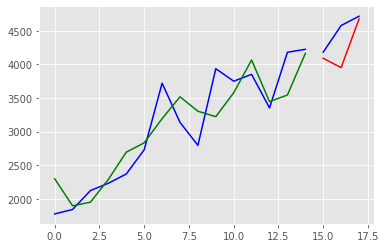

In [280]:
predictions10 = model10.predict(x_test10)
predictions_train10 = model10.predict(x_train10)

print(x_train10.shape)
print(y_train10.shape)
print(x_test10.shape)
print(y_test10.shape)
print(NN_AC_sku46.shape)

x2_10 = numpy.arange(0, 15, 1)
x3_10 = numpy.arange(15, 18, 1)

plt.plot(x2_10, y_train10, color='blue')
plt.plot(x2_10, predictions_train10, color='green')
plt.plot(x3_10, y_test10, color='blue')
plt.plot(x3_10, predictions10, color='red')

# redline - прогноз, greenline - подгонка

In [343]:
print(predictions10)

[[4090.8923]
 [3951.6152]
 [4675.5454]]


In [57]:
# -SKU#48-

In [322]:
AC_sku48 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #48')]
AC_sku48.drop('sku_id', axis=1, inplace=True)
#AC_sku48.iloc[:,1].plot()

NN_AC_sku48 = pd.DataFrame()

for i in range(12,0,-1):
    NN_AC_sku48['t-' + str(i)] = AC_sku48.iloc[:,1].shift(i)
    
NN_AC_sku48['t'] = AC_sku48.iloc[:,1].values
#print(NN_AC_sku48.head(13))

new_NN_AC_sku48 = NN_AC_sku48[12:]
#new_NN_AC_sku48.head()

y11 = new_NN_AC_sku48['t']
x11 = new_NN_AC_sku48.drop('t', axis=1)

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train11 = x11[:15]
y_train11 = y11[:15]
x_test11 = x11[15:]
y_test11 = y11[15:]

#print(new_NN_AC_sku48.shape)
#print(x_train11.shape)
#print(y_train11.shape)
#print(x_test11.shape)
#print(y_test11.shape)
#print(x_train11.head(5))

x_train11 = x_train11.values
y_train11 = y_train11.values
x_test11 = x_test11.values
y_test11 = y_test11.values

# NN

model11 = Sequential()
model11.add(Dense(6, input_dim=12, activation='relu'))
model11.add(Dense(1, activation='linear'))
model11.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape'])
model11.fit(x_train11, y_train11, epochs=300, batch_size=None)

Epoch 1/300
15/15 [==============================] - 8s 518ms/step - loss: 10404553.0000 - mean_absolute_percentage_error: 41.7230
Epoch 2/300
15/15 [==============================] - 0s 399us/step - loss: 9819947.0000 - mean_absolute_percentage_error: 40.8250
Epoch 3/300
15/15 [==============================] - 0s 465us/step - loss: 9266831.0000 - mean_absolute_percentage_error: 39.8089
Epoch 4/300
15/15 [==============================] - 0s 399us/step - loss: 8788662.0000 - mean_absolute_percentage_error: 38.8207
Epoch 5/300
15/15 [==============================] - 0s 598us/step - loss: 8305177.5000 - mean_absolute_percentage_error: 38.0806
Epoch 6/300
15/15 [==============================] - 0s 400us/step - loss: 7883247.0000 - mean_absolute_percentage_error: 37.4009
Epoch 7/300
15/15 [==============================] - 0s 798us/step - loss: 7489366.0000 - mean_absolute_percentage_error: 36.6939
Epoch 8/300
15/15 [==============================] - 0s 731us/step - loss: 7136826.5000 -

Epoch 64/300
15/15 [==============================] - 0s 332us/step - loss: 3169097.0000 - mean_absolute_percentage_error: 23.1153
Epoch 65/300
15/15 [==============================] - 0s 465us/step - loss: 3131310.2500 - mean_absolute_percentage_error: 22.9719
Epoch 66/300
15/15 [==============================] - 0s 532us/step - loss: 3093696.0000 - mean_absolute_percentage_error: 22.8539
Epoch 67/300
15/15 [==============================] - 0s 532us/step - loss: 3056557.2500 - mean_absolute_percentage_error: 22.7476
Epoch 68/300
15/15 [==============================] - 0s 465us/step - loss: 3020847.0000 - mean_absolute_percentage_error: 22.6434
Epoch 69/300
15/15 [==============================] - 0s 2ms/step - loss: 2985368.0000 - mean_absolute_percentage_error: 22.5334
Epoch 70/300
15/15 [==============================] - 0s 1ms/step - loss: 2949459.2500 - mean_absolute_percentage_error: 22.4164
Epoch 71/300
15/15 [==============================] - 0s 598us/step - loss: 2913182.500

Epoch 127/300
15/15 [==============================] - 0s 465us/step - loss: 1820768.0000 - mean_absolute_percentage_error: 17.4780
Epoch 128/300
15/15 [==============================] - 0s 598us/step - loss: 1809073.1250 - mean_absolute_percentage_error: 17.4210
Epoch 129/300
15/15 [==============================] - 0s 465us/step - loss: 1797876.7500 - mean_absolute_percentage_error: 17.3590
Epoch 130/300
15/15 [==============================] - 0s 332us/step - loss: 1786270.7500 - mean_absolute_percentage_error: 17.2909
Epoch 131/300
15/15 [==============================] - 0s 2ms/step - loss: 1774592.5000 - mean_absolute_percentage_error: 17.2173
Epoch 132/300
15/15 [==============================] - 0s 465us/step - loss: 1763449.2500 - mean_absolute_percentage_error: 17.1549
Epoch 133/300
15/15 [==============================] - 0s 599us/step - loss: 1752132.3750 - mean_absolute_percentage_error: 17.1013
Epoch 134/300
15/15 [==============================] - 0s 664us/step - loss: 1

Epoch 190/300
15/15 [==============================] - 0s 532us/step - loss: 1272372.8750 - mean_absolute_percentage_error: 14.3923
Epoch 191/300
15/15 [==============================] - 0s 2ms/step - loss: 1266245.8750 - mean_absolute_percentage_error: 14.3693
Epoch 192/300
15/15 [==============================] - 0s 2ms/step - loss: 1259800.1250 - mean_absolute_percentage_error: 14.3342
Epoch 193/300
15/15 [==============================] - 0s 532us/step - loss: 1253774.5000 - mean_absolute_percentage_error: 14.3037
Epoch 194/300
15/15 [==============================] - 0s 598us/step - loss: 1247711.7500 - mean_absolute_percentage_error: 14.2768
Epoch 195/300
15/15 [==============================] - 0s 732us/step - loss: 1241614.8750 - mean_absolute_percentage_error: 14.2534
Epoch 196/300
15/15 [==============================] - 0s 533us/step - loss: 1235497.1250 - mean_absolute_percentage_error: 14.2331
Epoch 197/300
15/15 [==============================] - 0s 532us/step - loss: 123

Epoch 253/300
15/15 [==============================] - 0s 531us/step - loss: 970866.2500 - mean_absolute_percentage_error: 12.8918
Epoch 254/300
15/15 [==============================] - 0s 665us/step - loss: 967131.5625 - mean_absolute_percentage_error: 12.8759
Epoch 255/300
15/15 [==============================] - 0s 466us/step - loss: 963378.6875 - mean_absolute_percentage_error: 12.8628
Epoch 256/300
15/15 [==============================] - 0s 598us/step - loss: 959641.3125 - mean_absolute_percentage_error: 12.8516
Epoch 257/300
15/15 [==============================] - 0s 532us/step - loss: 956884.9375 - mean_absolute_percentage_error: 12.8434
Epoch 258/300
15/15 [==============================] - 0s 599us/step - loss: 953261.4375 - mean_absolute_percentage_error: 12.8187
Epoch 259/300
15/15 [==============================] - 0s 665us/step - loss: 949115.1250 - mean_absolute_percentage_error: 12.7797
Epoch 260/300
15/15 [==============================] - 0s 399us/step - loss: 945802

In [316]:
scores11 = model11.evaluate(x_test11, y_test11)
y_pred11 = model11.predict(x_test11)

def smape(y_test11, y_pred11):
    return 100/len(y_test11) * np.sum(2 * np.abs(y_pred11 - y_test11) / (np.abs(y_test11) + np.abs(y_pred11)))

print(smape(y_test11, y_pred11))
# Подсчитали SMAPE

3/3 [==============================] - 3s 973ms/step
46.14214154800027


(15, 12)
(15,)
(3, 12)
(3,)
(30, 13)


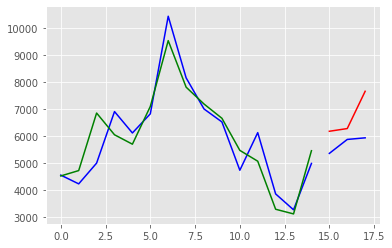

In [317]:
predictions11 = model11.predict(x_test11)
predictions_train11 = model11.predict(x_train11)

print(x_train11.shape)
print(y_train11.shape)
print(x_test11.shape)
print(y_test11.shape)
print(NN_AC_sku48.shape)

x2_11 = numpy.arange(0, 15, 1)
x3_11 = numpy.arange(15, 18, 1)

plt.plot(x2_11, y_train11, color='blue')
plt.plot(x2_11, predictions_train11, color='green')
plt.plot(x3_11, y_test11, color='blue')
plt.plot(x3_11, predictions11, color='red')

# redline - прогноз, greenline - подгонка

In [344]:
print(predictions11)

[[6170.8125]
 [6270.856 ]
 [7650.5835]]


In [61]:
# -SKU#49-

In [328]:
AC_sku49 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #49')]
AC_sku49.drop('sku_id', axis=1, inplace=True)
#AC_sku49.iloc[:,1].plot()

NN_AC_sku49 = pd.DataFrame()

for i in range(12,0,-1):
    NN_AC_sku49['t-' + str(i)] = AC_sku49.iloc[:,1].shift(i)
    
NN_AC_sku49['t'] = AC_sku49.iloc[:,1].values
#print(NN_AC_sku49.head(13))

new_NN_AC_sku49 = NN_AC_sku49[12:]
#new_NN_AC_sku49.head()

y12 = new_NN_AC_sku49['t']
x12 = new_NN_AC_sku49.drop('t', axis=1)

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train12 = x12[:15]
y_train12 = y12[:15]
x_test12 = x12[15:]
y_test12 = y12[15:]

#print(new_NN_AC_sku49.shape)
#print(x_train12.shape)
#print(y_train12.shape)
#print(x_test12.shape)
#print(y_test12.shape)
#print(x_train12.head(5))

x_train12 = x_train12.values
y_train12 = y_train12.values
x_test12 = x_test12.values
y_test12 = y_test12.values

# NN

model12 = Sequential()
model12.add(Dense(6, input_dim=12, activation='relu'))
model12.add(Dense(1, activation='linear'))
model12.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape'])
model12.fit(x_train12, y_train12, epochs=300, batch_size=None)

Epoch 1/300
15/15 [==============================] - 8s 540ms/step - loss: 119984160.0000 - mean_absolute_percentage_error: 287.0508
Epoch 2/300
15/15 [==============================] - 0s 598us/step - loss: 115800248.0000 - mean_absolute_percentage_error: 281.8094
Epoch 3/300
15/15 [==============================] - 0s 465us/step - loss: 111695664.0000 - mean_absolute_percentage_error: 276.5737
Epoch 4/300
15/15 [==============================] - 0s 465us/step - loss: 107671528.0000 - mean_absolute_percentage_error: 271.3456
Epoch 5/300
15/15 [==============================] - 0s 333us/step - loss: 103729056.0000 - mean_absolute_percentage_error: 266.1271
Epoch 6/300
15/15 [==============================] - 0s 598us/step - loss: 99869208.0000 - mean_absolute_percentage_error: 260.9201
Epoch 7/300
15/15 [==============================] - 0s 731us/step - loss: 96092856.0000 - mean_absolute_percentage_error: 255.7265
Epoch 8/300
15/15 [==============================] - 0s 532us/step - lo

Epoch 63/300
15/15 [==============================] - 0s 399us/step - loss: 5055426.5000 - mean_absolute_percentage_error: 53.9273
Epoch 64/300
15/15 [==============================] - 0s 598us/step - loss: 4724212.5000 - mean_absolute_percentage_error: 51.8816
Epoch 65/300
15/15 [==============================] - 0s 665us/step - loss: 4412381.5000 - mean_absolute_percentage_error: 49.8836
Epoch 66/300
15/15 [==============================] - 0s 399us/step - loss: 4119043.2500 - mean_absolute_percentage_error: 47.9329
Epoch 67/300
15/15 [==============================] - 0s 598us/step - loss: 3843332.7500 - mean_absolute_percentage_error: 46.0292
Epoch 68/300
15/15 [==============================] - 0s 532us/step - loss: 3584417.5000 - mean_absolute_percentage_error: 44.1720
Epoch 69/300
15/15 [==============================] - 0s 665us/step - loss: 3341488.0000 - mean_absolute_percentage_error: 42.3611
Epoch 70/300
15/15 [==============================] - 0s 598us/step - loss: 3113766

Epoch 126/300
15/15 [==============================] - 0s 532us/step - loss: 336390.6562 - mean_absolute_percentage_error: 13.1911
Epoch 127/300
15/15 [==============================] - 0s 598us/step - loss: 335733.4688 - mean_absolute_percentage_error: 13.2062
Epoch 128/300
15/15 [==============================] - 0s 532us/step - loss: 335169.0938 - mean_absolute_percentage_error: 13.2200
Epoch 129/300
15/15 [==============================] - 0s 598us/step - loss: 334682.9375 - mean_absolute_percentage_error: 13.2327
Epoch 130/300
15/15 [==============================] - 0s 532us/step - loss: 334262.5625 - mean_absolute_percentage_error: 13.2443
Epoch 131/300
15/15 [==============================] - 0s 598us/step - loss: 333897.3125 - mean_absolute_percentage_error: 13.2549
Epoch 132/300
15/15 [==============================] - 0s 665us/step - loss: 333581.0312 - mean_absolute_percentage_error: 13.2645
Epoch 133/300
15/15 [==============================] - 0s 731us/step - loss: 333304

Epoch 189/300
15/15 [==============================] - 0s 598us/step - loss: 325171.6250 - mean_absolute_percentage_error: 13.1822
Epoch 190/300
15/15 [==============================] - 0s 798us/step - loss: 325030.4688 - mean_absolute_percentage_error: 13.1785
Epoch 191/300
15/15 [==============================] - 0s 399us/step - loss: 324889.6562 - mean_absolute_percentage_error: 13.1749
Epoch 192/300
15/15 [==============================] - 0s 466us/step - loss: 324748.8125 - mean_absolute_percentage_error: 13.1713
Epoch 193/300
15/15 [==============================] - 0s 399us/step - loss: 324608.0625 - mean_absolute_percentage_error: 13.1678
Epoch 194/300
15/15 [==============================] - 0s 731us/step - loss: 324467.2812 - mean_absolute_percentage_error: 13.1642
Epoch 195/300
15/15 [==============================] - 0s 798us/step - loss: 324327.1875 - mean_absolute_percentage_error: 13.1607
Epoch 196/300
15/15 [==============================] - 0s 598us/step - loss: 324187

Epoch 252/300
15/15 [==============================] - 0s 398us/step - loss: 316426.0625 - mean_absolute_percentage_error: 12.9838
Epoch 253/300
15/15 [==============================] - 0s 598us/step - loss: 316289.1250 - mean_absolute_percentage_error: 12.9807
Epoch 254/300
15/15 [==============================] - 0s 665us/step - loss: 316153.1562 - mean_absolute_percentage_error: 12.9777
Epoch 255/300
15/15 [==============================] - 0s 665us/step - loss: 316016.5312 - mean_absolute_percentage_error: 12.9746
Epoch 256/300
15/15 [==============================] - 0s 2ms/step - loss: 315880.4062 - mean_absolute_percentage_error: 12.9715
Epoch 257/300
15/15 [==============================] - 0s 665us/step - loss: 315744.0625 - mean_absolute_percentage_error: 12.9684
Epoch 258/300
15/15 [==============================] - 0s 931us/step - loss: 315608.0000 - mean_absolute_percentage_error: 12.9654
Epoch 259/300
15/15 [==============================] - 0s 598us/step - loss: 315472.2

In [329]:
scores12 = model12.evaluate(x_test12, y_test12)
y_pred12 = model12.predict(x_test12)

def smape(y_test12, y_pred12):
    return 100/len(y_test12) * np.sum(2 * np.abs(y_pred12 - y_test12) / (np.abs(y_test12) + np.abs(y_pred12)))

print(smape(y_test12, y_pred12))
# Подсчитали SMAPE

3/3 [==============================] - 3s 1s/step
45.75470421064532


(15, 12)
(15,)
(3, 12)
(3,)
(30, 13)


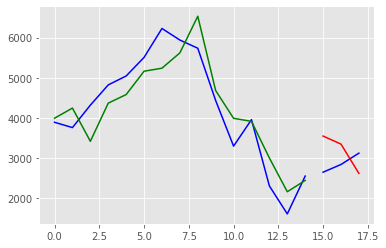

In [330]:
predictions12 = model12.predict(x_test12)
predictions_train12 = model12.predict(x_train12)

print(x_train12.shape)
print(y_train12.shape)
print(x_test12.shape)
print(y_test12.shape)
print(NN_AC_sku49.shape)

x2_12 = numpy.arange(0, 15, 1)
x3_12 = numpy.arange(15, 18, 1)

plt.plot(x2_12, y_train12, color='blue')
plt.plot(x2_12, predictions_train12, color='green')
plt.plot(x3_12, y_test12, color='blue')
plt.plot(x3_12, predictions12, color='red')

# redline - прогноз, greenline - подгонка

In [332]:
print(predictions12)

[[3551.09  ]
 [3350.754 ]
 [2621.5615]]


In [65]:
# -SKU#67-

In [348]:
AC_sku67 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #67')]
AC_sku67.drop('sku_id', axis=1, inplace=True)
#AC_sku67.iloc[:,1].plot()

NN_AC_sku67 = pd.DataFrame()

for i in range(12,0,-1):
    NN_AC_sku67['t-' + str(i)] = AC_sku67.iloc[:,1].shift(i)
    
NN_AC_sku67['t'] = AC_sku67.iloc[:,1].values
#print(NN_AC_sku67.head(13))

new_NN_AC_sku67 = NN_AC_sku67[12:]
#new_NN_AC_sku67.head()

y13 = new_NN_AC_sku67['t']
x13 = new_NN_AC_sku67.drop('t', axis=1)

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train13 = x13[:12]
y_train13 = y13[:12]
x_test13 = x13[12:]
y_test13 = y13[12:]

#print(new_NN_AC_sku67.shape)
#print(x_train13.shape)
#print(y_train13.shape)
#print(x_test13.shape)
#print(y_test13.shape)
#print(x_train13.head(5))

x_train13 = x_train13.values
y_train13 = y_train13.values
x_test13 = x_test13.values
y_test13 = y_test13.values

# NN

model13 = Sequential()
model13.add(Dense(6, input_dim=12, activation='relu'))
model13.add(Dense(1, activation='linear'))
model13.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape'])
model13.fit(x_train13, y_train13, epochs=300, batch_size=None)

Epoch 1/300
12/12 [==============================] - 8s 698ms/step - loss: 47818.5742 - mean_absolute_percentage_error: 30.7563
Epoch 2/300
12/12 [==============================] - 0s 412us/step - loss: 45219.2070 - mean_absolute_percentage_error: 30.9381
Epoch 3/300
12/12 [==============================] - 0s 663us/step - loss: 42940.7188 - mean_absolute_percentage_error: 31.2338
Epoch 4/300
12/12 [==============================] - 0s 582us/step - loss: 40921.7344 - mean_absolute_percentage_error: 31.3877
Epoch 5/300
12/12 [==============================] - 0s 582us/step - loss: 39151.5742 - mean_absolute_percentage_error: 31.4358
Epoch 6/300
12/12 [==============================] - 0s 3ms/step - loss: 37765.2969 - mean_absolute_percentage_error: 31.4538
Epoch 7/300
12/12 [==============================] - 0s 749us/step - loss: 36539.7070 - mean_absolute_percentage_error: 31.7293
Epoch 8/300
12/12 [==============================] - 0s 497us/step - loss: 35422.2773 - mean_absolute_perc

Epoch 65/300
12/12 [==============================] - 0s 829us/step - loss: 10314.3467 - mean_absolute_percentage_error: 16.7058
Epoch 66/300
12/12 [==============================] - 0s 582us/step - loss: 10220.7021 - mean_absolute_percentage_error: 16.6417
Epoch 67/300
12/12 [==============================] - 0s 749us/step - loss: 10128.4756 - mean_absolute_percentage_error: 16.5812
Epoch 68/300
12/12 [==============================] - 0s 831us/step - loss: 10037.6455 - mean_absolute_percentage_error: 16.5236
Epoch 69/300
12/12 [==============================] - 0s 582us/step - loss: 9968.3564 - mean_absolute_percentage_error: 16.4757
Epoch 70/300
12/12 [==============================] - 0s 914us/step - loss: 9894.3467 - mean_absolute_percentage_error: 16.4110
Epoch 71/300
12/12 [==============================] - 0s 914us/step - loss: 9815.0654 - mean_absolute_percentage_error: 16.3310
Epoch 72/300
12/12 [==============================] - 0s 499us/step - loss: 9731.2383 - mean_absolut

Epoch 129/300
12/12 [==============================] - 0s 496us/step - loss: 6412.3540 - mean_absolute_percentage_error: 12.5088
Epoch 130/300
12/12 [==============================] - 0s 665us/step - loss: 6370.1470 - mean_absolute_percentage_error: 12.4454
Epoch 131/300
12/12 [==============================] - 0s 413us/step - loss: 6329.6914 - mean_absolute_percentage_error: 12.3721
Epoch 132/300
12/12 [==============================] - 0s 1ms/step - loss: 6292.0249 - mean_absolute_percentage_error: 12.3108
Epoch 133/300
12/12 [==============================] - 0s 748us/step - loss: 6252.3394 - mean_absolute_percentage_error: 12.2590
Epoch 134/300
12/12 [==============================] - 0s 746us/step - loss: 6211.4004 - mean_absolute_percentage_error: 12.2163
Epoch 135/300
12/12 [==============================] - 0s 582us/step - loss: 6173.9282 - mean_absolute_percentage_error: 12.1833
Epoch 136/300
12/12 [==============================] - 0s 499us/step - loss: 6136.3062 - mean_absol

Epoch 193/300
12/12 [==============================] - 0s 1ms/step - loss: 4242.5269 - mean_absolute_percentage_error: 9.3687
Epoch 194/300
12/12 [==============================] - 0s 663us/step - loss: 4213.8281 - mean_absolute_percentage_error: 9.3260
Epoch 195/300
12/12 [==============================] - 0s 416us/step - loss: 4188.4175 - mean_absolute_percentage_error: 9.2944
Epoch 196/300
12/12 [==============================] - 0s 1ms/step - loss: 4161.3179 - mean_absolute_percentage_error: 9.2490
Epoch 197/300
12/12 [==============================] - 0s 748us/step - loss: 4131.8569 - mean_absolute_percentage_error: 9.1908
Epoch 198/300
12/12 [==============================] - 0s 1ms/step - loss: 4107.4126 - mean_absolute_percentage_error: 9.1255
Epoch 199/300
12/12 [==============================] - 0s 998us/step - loss: 4082.2080 - mean_absolute_percentage_error: 9.0740
Epoch 200/300
12/12 [==============================] - 0s 914us/step - loss: 4055.0364 - mean_absolute_percent

Epoch 258/300
12/12 [==============================] - 0s 665us/step - loss: 2782.7546 - mean_absolute_percentage_error: 7.3416
Epoch 259/300
12/12 [==============================] - 0s 744us/step - loss: 2764.4238 - mean_absolute_percentage_error: 7.3139
Epoch 260/300
12/12 [==============================] - 0s 748us/step - loss: 2748.1418 - mean_absolute_percentage_error: 7.2803
Epoch 261/300
12/12 [==============================] - 0s 501us/step - loss: 2731.0759 - mean_absolute_percentage_error: 7.2564
Epoch 262/300
12/12 [==============================] - 0s 831us/step - loss: 2712.0112 - mean_absolute_percentage_error: 7.2407
Epoch 263/300
12/12 [==============================] - 0s 749us/step - loss: 2698.1023 - mean_absolute_percentage_error: 7.2360
Epoch 264/300
12/12 [==============================] - 0s 499us/step - loss: 2682.6414 - mean_absolute_percentage_error: 7.2205
Epoch 265/300
12/12 [==============================] - 0s 1ms/step - loss: 2665.4810 - mean_absolute_per

In [349]:
scores13 = model13.evaluate(x_test13, y_test13)
y_pred13 = model13.predict(x_test13)

def smape(y_test13, y_pred13):
    return 100/len(y_test13) * np.sum(2 * np.abs(y_pred13 - y_test13) / (np.abs(y_test13) + np.abs(y_pred13)))

print(smape(y_test13, y_pred13))
# Подсчитали SMAPE

3/3 [==============================] - 3s 1s/step
281.7192105510317


(12, 12)
(12,)
(3, 12)
(3,)
(27, 13)


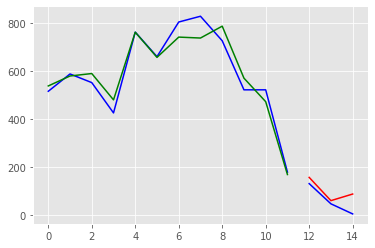

In [350]:
predictions13 = model13.predict(x_test13)
predictions_train13 = model13.predict(x_train13)

print(x_train13.shape)
print(y_train13.shape)
print(x_test13.shape)
print(y_test13.shape)
print(NN_AC_sku67.shape)

x2_13 = numpy.arange(0, 12, 1)
x3_13 = numpy.arange(12, 15, 1)

plt.plot(x2_13, y_train13, color='blue')
plt.plot(x2_13, predictions_train13, color='green')
plt.plot(x3_13, y_test13, color='blue')
plt.plot(x3_13, predictions13, color='red')

# redline - прогноз, greenline - подгонка

In [351]:
print(predictions13)

[[157.89668]
 [ 61.19411]
 [ 88.67291]]


In [69]:
# -SKU#73-

In [362]:
AC_sku73 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #73')]
AC_sku73.drop('sku_id', axis=1, inplace=True)
#AC_sku73.iloc[:,1].plot()

NN_AC_sku73 = pd.DataFrame()

for i in range(12,0,-1):
    NN_AC_sku73['t-' + str(i)] = AC_sku73.iloc[:,1].shift(i)
    
NN_AC_sku73['t'] = AC_sku73.iloc[:,1].values
#print(NN_AC_sku73.head(13))

new_NN_AC_sku73 = NN_AC_sku73[12:]
#new_NN_AC_sku73.head()

y14 = new_NN_AC_sku73['t']
x14 = new_NN_AC_sku73.drop('t', axis=1)

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train14 = x14[:15]
y_train14 = y14[:15]
x_test14 = x14[15:]
y_test14 = y14[15:]

#print(new_NN_AC_sku73.shape)
#print(x_train14.shape)
#print(y_train14.shape)
#print(x_test14.shape)
#print(y_test14.shape)
#print(x_train14.head(5))

x_train14 = x_train14.values
y_train14 = y_train14.values
x_test14 = x_test14.values
y_test14 = y_test14.values

# NN

model14 = Sequential()
model14.add(Dense(6, input_dim=12, activation='relu'))
model14.add(Dense(1, activation='linear'))
model14.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape'])
model14.fit(x_train14, y_train14, epochs=300, batch_size=None)

Epoch 1/300
15/15 [==============================] - 9s 572ms/step - loss: 7393874.5000 - mean_absolute_percentage_error: 61.7517
Epoch 2/300
15/15 [==============================] - 0s 464us/step - loss: 7047042.0000 - mean_absolute_percentage_error: 59.4906
Epoch 3/300
15/15 [==============================] - 0s 465us/step - loss: 6722222.5000 - mean_absolute_percentage_error: 57.3612
Epoch 4/300
15/15 [==============================] - 0s 466us/step - loss: 6413547.5000 - mean_absolute_percentage_error: 55.2561
Epoch 5/300
15/15 [==============================] - 0s 466us/step - loss: 6122089.5000 - mean_absolute_percentage_error: 53.1852
Epoch 6/300
15/15 [==============================] - 0s 864us/step - loss: 5843754.0000 - mean_absolute_percentage_error: 51.1283
Epoch 7/300
15/15 [==============================] - 0s 665us/step - loss: 5578445.0000 - mean_absolute_percentage_error: 49.0865
Epoch 8/300
15/15 [==============================] - 0s 667us/step - loss: 5326088.5000 - 

Epoch 64/300
15/15 [==============================] - 0s 332us/step - loss: 1301655.6250 - mean_absolute_percentage_error: 23.5527
Epoch 65/300
15/15 [==============================] - 0s 465us/step - loss: 1277464.0000 - mean_absolute_percentage_error: 23.1875
Epoch 66/300
15/15 [==============================] - 0s 465us/step - loss: 1254947.1250 - mean_absolute_percentage_error: 22.8305
Epoch 67/300
15/15 [==============================] - 0s 465us/step - loss: 1234311.2500 - mean_absolute_percentage_error: 22.4910
Epoch 68/300
15/15 [==============================] - 0s 2ms/step - loss: 1216515.3750 - mean_absolute_percentage_error: 22.1876
Epoch 69/300
15/15 [==============================] - 0s 532us/step - loss: 1198820.7500 - mean_absolute_percentage_error: 21.8847
Epoch 70/300
15/15 [==============================] - 0s 665us/step - loss: 1178530.5000 - mean_absolute_percentage_error: 21.5370
Epoch 71/300
15/15 [==============================] - 0s 798us/step - loss: 1158600.8

Epoch 127/300
15/15 [==============================] - 0s 534us/step - loss: 548936.7500 - mean_absolute_percentage_error: 13.3662
Epoch 128/300
15/15 [==============================] - 0s 332us/step - loss: 541470.9375 - mean_absolute_percentage_error: 13.2895
Epoch 129/300
15/15 [==============================] - 0s 931us/step - loss: 534151.6875 - mean_absolute_percentage_error: 13.2178
Epoch 130/300
15/15 [==============================] - 0s 467us/step - loss: 526983.6250 - mean_absolute_percentage_error: 13.1499
Epoch 131/300
15/15 [==============================] - 0s 532us/step - loss: 519970.2188 - mean_absolute_percentage_error: 13.0832
Epoch 132/300
15/15 [==============================] - 0s 665us/step - loss: 513113.2188 - mean_absolute_percentage_error: 13.0174
Epoch 133/300
15/15 [==============================] - 0s 597us/step - loss: 506412.8438 - mean_absolute_percentage_error: 12.9522
Epoch 134/300
15/15 [==============================] - 0s 465us/step - loss: 499866

Epoch 190/300
15/15 [==============================] - 0s 799us/step - loss: 305906.4688 - mean_absolute_percentage_error: 10.4399
Epoch 191/300
15/15 [==============================] - 0s 465us/step - loss: 304131.0625 - mean_absolute_percentage_error: 10.4310
Epoch 192/300
15/15 [==============================] - 0s 864us/step - loss: 302375.7188 - mean_absolute_percentage_error: 10.4199
Epoch 193/300
15/15 [==============================] - 0s 731us/step - loss: 300634.5000 - mean_absolute_percentage_error: 10.4064
Epoch 194/300
15/15 [==============================] - 0s 798us/step - loss: 298905.8750 - mean_absolute_percentage_error: 10.3903
Epoch 195/300
15/15 [==============================] - 0s 665us/step - loss: 297189.3750 - mean_absolute_percentage_error: 10.3716
Epoch 196/300
15/15 [==============================] - 0s 731us/step - loss: 295484.5312 - mean_absolute_percentage_error: 10.3506
Epoch 197/300
15/15 [==============================] - 0s 465us/step - loss: 293791

Epoch 253/300
15/15 [==============================] - 0s 532us/step - loss: 223850.2188 - mean_absolute_percentage_error: 9.5094
Epoch 254/300
15/15 [==============================] - 0s 399us/step - loss: 222892.4062 - mean_absolute_percentage_error: 9.4952
Epoch 255/300
15/15 [==============================] - 0s 730us/step - loss: 221941.3594 - mean_absolute_percentage_error: 9.4809
Epoch 256/300
15/15 [==============================] - 0s 598us/step - loss: 220998.0938 - mean_absolute_percentage_error: 9.4664
Epoch 257/300
15/15 [==============================] - 0s 399us/step - loss: 220061.7500 - mean_absolute_percentage_error: 9.4518
Epoch 258/300
15/15 [==============================] - 0s 731us/step - loss: 219132.4688 - mean_absolute_percentage_error: 9.4371
Epoch 259/300
15/15 [==============================] - 0s 798us/step - loss: 218210.0469 - mean_absolute_percentage_error: 9.4223
Epoch 260/300
15/15 [==============================] - 0s 399us/step - loss: 217294.7812 -

In [363]:
scores14 = model14.evaluate(x_test14, y_test14)
y_pred14 = model14.predict(x_test14)

def smape(y_test14, y_pred14):
    return 100/len(y_test14) * np.sum(2 * np.abs(y_pred14 - y_test14) / (np.abs(y_test14) + np.abs(y_pred14)))

print(smape(y_test14, y_pred14))
# Подсчитали SMAPE

3/3 [==============================] - 3s 1s/step
42.32120471729017


(15, 12)
(15,)
(3, 12)
(3,)
(30, 13)


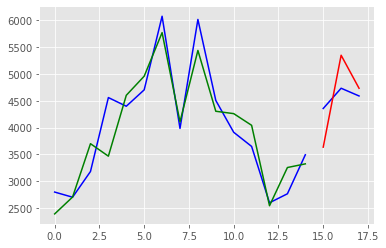

In [364]:
predictions14 = model14.predict(x_test14)
predictions_train14 = model14.predict(x_train14)

print(x_train14.shape)
print(y_train14.shape)
print(x_test14.shape)
print(y_test14.shape)
print(NN_AC_sku73.shape)

x2_14 = numpy.arange(0, 15, 1)
x3_14 = numpy.arange(15, 18, 1)

plt.plot(x2_14, y_train14, color='blue')
plt.plot(x2_14, predictions_train14, color='green')
plt.plot(x3_14, y_test14, color='blue')
plt.plot(x3_14, predictions14, color='red')

# redline - прогноз, greenline - подгонка

In [365]:
print(predictions14)

[[3634.517]
 [5350.022]
 [4733.779]]


In [73]:
# -SKU#76-

In [379]:
AC_sku76 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #76')]
AC_sku76.drop('sku_id', axis=1, inplace=True)
#AC_sku76.iloc[:,1].plot()

NN_AC_sku76 = pd.DataFrame()

for i in range(12,0,-1):
    NN_AC_sku76['t-' + str(i)] = AC_sku76.iloc[:,1].shift(i)
    
NN_AC_sku76['t'] = AC_sku76.iloc[:,1].values
#print(NN_AC_sku76.head(13))

new_NN_AC_sku76 = NN_AC_sku76[12:]
#new_NN_AC_sku76.head()

y15 = new_NN_AC_sku76['t']
x15 = new_NN_AC_sku76.drop('t', axis=1)

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train15 = x15[:7]
y_train15 = y15[:7]
x_test15 = x15[7:]
y_test15 = y15[7:]

#print(new_NN_AC_sku76.shape)
#print(x_train15.shape)
#print(y_train15.shape)
#print(x_test15.shape)
#print(y_test15.shape)
#print(x_train15.head(5))

x_train15 = x_train15.values
y_train15 = y_train15.values
x_test15 = x_test15.values
y_test15 = y_test15.values

# NN

model15 = Sequential()
model15.add(Dense(6, input_dim=12, activation='relu'))
model15.add(Dense(1, activation='linear'))
model15.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape'])
model15.fit(x_train15, y_train15, epochs=300, batch_size=None)

Epoch 1/300
7/7 [==============================] - 9s 1s/step - loss: 598409.5625 - mean_absolute_percentage_error: 20.1779
Epoch 2/300
7/7 [==============================] - 0s 856us/step - loss: 583301.1875 - mean_absolute_percentage_error: 19.9728
Epoch 3/300
7/7 [==============================] - 0s 1ms/step - loss: 570288.5000 - mean_absolute_percentage_error: 19.7681
Epoch 4/300
7/7 [==============================] - 0s 851us/step - loss: 559338.1250 - mean_absolute_percentage_error: 19.7304
Epoch 5/300
7/7 [==============================] - 0s 1ms/step - loss: 550306.5000 - mean_absolute_percentage_error: 19.7827
Epoch 6/300
7/7 [==============================] - 0s 2ms/step - loss: 541164.5000 - mean_absolute_percentage_error: 19.7471
Epoch 7/300
7/7 [==============================] - 0s 1ms/step - loss: 532251.7500 - mean_absolute_percentage_error: 19.6326
Epoch 8/300
7/7 [==============================] - 0s 2ms/step - loss: 524237.9375 - mean_absolute_percentage_error: 19.49

Epoch 66/300
7/7 [==============================] - 0s 2ms/step - loss: 336432.1875 - mean_absolute_percentage_error: 13.0126
Epoch 67/300
7/7 [==============================] - 0s 2ms/step - loss: 334326.6875 - mean_absolute_percentage_error: 12.9606
Epoch 68/300
7/7 [==============================] - 0s 1ms/step - loss: 332234.3125 - mean_absolute_percentage_error: 12.9079
Epoch 69/300
7/7 [==============================] - 0s 2ms/step - loss: 330139.8438 - mean_absolute_percentage_error: 12.8538
Epoch 70/300
7/7 [==============================] - 0s 997us/step - loss: 328072.1875 - mean_absolute_percentage_error: 12.7990
Epoch 71/300
7/7 [==============================] - 0s 2ms/step - loss: 326016.4688 - mean_absolute_percentage_error: 12.7428
Epoch 72/300
7/7 [==============================] - 0s 3ms/step - loss: 323971.8438 - mean_absolute_percentage_error: 12.6853
Epoch 73/300
7/7 [==============================] - 0s 994us/step - loss: 321925.1562 - mean_absolute_percentage_err

Epoch 131/300
7/7 [==============================] - 0s 1ms/step - loss: 217684.6094 - mean_absolute_percentage_error: 9.7267
Epoch 132/300
7/7 [==============================] - 0s 2ms/step - loss: 216106.2500 - mean_absolute_percentage_error: 9.6590
Epoch 133/300
7/7 [==============================] - 0s 1ms/step - loss: 214550.6719 - mean_absolute_percentage_error: 9.6051
Epoch 134/300
7/7 [==============================] - 0s 997us/step - loss: 212993.7969 - mean_absolute_percentage_error: 9.5597
Epoch 135/300
7/7 [==============================] - 0s 1ms/step - loss: 211435.4219 - mean_absolute_percentage_error: 9.5223
Epoch 136/300
7/7 [==============================] - 0s 2ms/step - loss: 209888.2188 - mean_absolute_percentage_error: 9.4939
Epoch 137/300
7/7 [==============================] - 0s 1ms/step - loss: 208360.8438 - mean_absolute_percentage_error: 9.4639
Epoch 138/300
7/7 [==============================] - 0s 1ms/step - loss: 206836.5469 - mean_absolute_percentage_erro

Epoch 196/300
7/7 [==============================] - 0s 1ms/step - loss: 133108.0156 - mean_absolute_percentage_error: 7.8463
Epoch 197/300
7/7 [==============================] - 0s 1ms/step - loss: 132093.8906 - mean_absolute_percentage_error: 7.8119
Epoch 198/300
7/7 [==============================] - 0s 3ms/step - loss: 131105.6406 - mean_absolute_percentage_error: 7.7913
Epoch 199/300
7/7 [==============================] - 0s 997us/step - loss: 130094.1875 - mean_absolute_percentage_error: 7.7793
Epoch 200/300
7/7 [==============================] - 0s 1ms/step - loss: 129181.8047 - mean_absolute_percentage_error: 7.7844
Epoch 201/300
7/7 [==============================] - 0s 1ms/step - loss: 128211.5547 - mean_absolute_percentage_error: 7.7643
Epoch 202/300
7/7 [==============================] - 0s 1ms/step - loss: 127185.9297 - mean_absolute_percentage_error: 7.7214
Epoch 203/300
7/7 [==============================] - 0s 1ms/step - loss: 126249.3125 - mean_absolute_percentage_erro

Epoch 262/300
7/7 [==============================] - 0s 1ms/step - loss: 84000.4453 - mean_absolute_percentage_error: 7.1666
Epoch 263/300
7/7 [==============================] - 0s 996us/step - loss: 83466.5781 - mean_absolute_percentage_error: 7.1448
Epoch 264/300
7/7 [==============================] - 0s 998us/step - loss: 82934.8906 - mean_absolute_percentage_error: 7.1353
Epoch 265/300
7/7 [==============================] - 0s 3ms/step - loss: 82472.4141 - mean_absolute_percentage_error: 7.1411
Epoch 266/300
7/7 [==============================] - 0s 1ms/step - loss: 81900.3359 - mean_absolute_percentage_error: 7.1118
Epoch 267/300
7/7 [==============================] - 0s 1ms/step - loss: 81392.5859 - mean_absolute_percentage_error: 7.0992
Epoch 268/300
7/7 [==============================] - 0s 1ms/step - loss: 80914.5859 - mean_absolute_percentage_error: 7.0998
Epoch 269/300
7/7 [==============================] - 0s 2ms/step - loss: 80402.1328 - mean_absolute_percentage_error: 7.0

In [380]:
scores15 = model15.evaluate(x_test15, y_test15)
y_pred15 = model15.predict(x_test15)

def smape(y_test15, y_pred15):
    return 100/len(y_test15) * np.sum(2 * np.abs(y_pred15 - y_test15) / (np.abs(y_test15) + np.abs(y_pred15)))

print(smape(y_test15, y_pred15))
# Подсчитали SMAPE

3/3 [==============================] - 4s 1s/step
48.70808291229863


(7, 12)
(7,)
(3, 12)
(3,)
(22, 13)


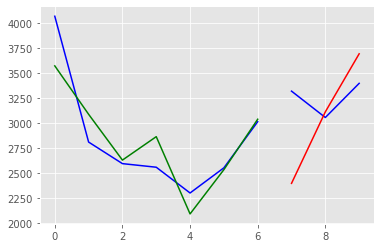

In [381]:
predictions15 = model15.predict(x_test15)
predictions_train15 = model15.predict(x_train15)

print(x_train15.shape)
print(y_train15.shape)
print(x_test15.shape)
print(y_test15.shape)
print(NN_AC_sku76.shape)

x2_15 = numpy.arange(0, 7, 1)
x3_15 = numpy.arange(7, 10, 1)

plt.plot(x2_15, y_train15, color='blue')
plt.plot(x2_15, predictions_train15, color='green')
plt.plot(x3_15, y_test15, color='blue')
plt.plot(x3_15, predictions15, color='red')

# redline - прогноз, greenline - подгонка

In [382]:
print(predictions15)

[[2394.4268]
 [3110.7793]
 [3691.8755]]


In [77]:
# -SKU#77-

In [394]:
AC_sku77 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #77')]
AC_sku77.drop('sku_id', axis=1, inplace=True)
#AC_sku77.iloc[:,1].plot()

NN_AC_sku77 = pd.DataFrame()

for i in range(12,0,-1):
    NN_AC_sku77['t-' + str(i)] = AC_sku77.iloc[:,1].shift(i)
    
NN_AC_sku77['t'] = AC_sku77.iloc[:,1].values
#print(NN_AC_sku77.head(13))

new_NN_AC_sku77 = NN_AC_sku77[12:]
#new_NN_AC_sku77.head()

y16 = new_NN_AC_sku77['t']
x16 = new_NN_AC_sku77.drop('t', axis=1)

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train16 = x16[:7]
y_train16 = y16[:7]
x_test16 = x16[7:]
y_test16 = y16[7:]

#print(new_NN_AC_sku77.shape)
#print(x_train16.shape)
#print(y_train16.shape)
#print(x_test16.shape)
#print(y_test16.shape)
#print(x_train16.head(5))

x_train16 = x_train16.values
y_train16 = y_train16.values
x_test16 = x_test16.values
y_test16 = y_test16.values

# NN

model16 = Sequential()
model16.add(Dense(6, input_dim=12, activation='relu'))
model16.add(Dense(1, activation='linear'))
model16.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape'])
model16.fit(x_train16, y_train16, epochs=300, batch_size=None)

Epoch 1/300
7/7 [==============================] - 10s 1s/step - loss: 4029372.0000 - mean_absolute_percentage_error: 53.5497
Epoch 2/300
7/7 [==============================] - 0s 855us/step - loss: 3910884.5000 - mean_absolute_percentage_error: 52.6393
Epoch 3/300
7/7 [==============================] - 0s 1ms/step - loss: 3793971.7500 - mean_absolute_percentage_error: 51.7255
Epoch 4/300
7/7 [==============================] - 0s 1ms/step - loss: 3678684.0000 - mean_absolute_percentage_error: 50.8087
Epoch 5/300
7/7 [==============================] - 0s 1ms/step - loss: 3565073.2500 - mean_absolute_percentage_error: 49.8891
Epoch 6/300
7/7 [==============================] - 0s 2ms/step - loss: 3457946.7500 - mean_absolute_percentage_error: 49.0064
Epoch 7/300
7/7 [==============================] - 0s 2ms/step - loss: 3347759.5000 - mean_absolute_percentage_error: 48.0820
Epoch 8/300
7/7 [==============================] - 0s 2ms/step - loss: 3241643.2500 - mean_absolute_percentage_error

Epoch 66/300
7/7 [==============================] - 0s 1ms/step - loss: 474950.7188 - mean_absolute_percentage_error: 11.7077
Epoch 67/300
7/7 [==============================] - 0s 1ms/step - loss: 471437.2500 - mean_absolute_percentage_error: 11.8027
Epoch 68/300
7/7 [==============================] - 0s 2ms/step - loss: 468398.0000 - mean_absolute_percentage_error: 11.8923
Epoch 69/300
7/7 [==============================] - 0s 2ms/step - loss: 465745.5312 - mean_absolute_percentage_error: 11.9779
Epoch 70/300
7/7 [==============================] - 0s 6ms/step - loss: 463475.0000 - mean_absolute_percentage_error: 12.0583
Epoch 71/300
7/7 [==============================] - 0s 2ms/step - loss: 461528.5000 - mean_absolute_percentage_error: 12.1343
Epoch 72/300
7/7 [==============================] - 0s 1ms/step - loss: 459869.0938 - mean_absolute_percentage_error: 12.2058
Epoch 73/300
7/7 [==============================] - 0s 2ms/step - loss: 458463.4688 - mean_absolute_percentage_error: 

Epoch 131/300
7/7 [==============================] - 0s 1ms/step - loss: 443800.5000 - mean_absolute_percentage_error: 12.5878
Epoch 132/300
7/7 [==============================] - 0s 1ms/step - loss: 443595.3125 - mean_absolute_percentage_error: 12.5802
Epoch 133/300
7/7 [==============================] - 0s 2ms/step - loss: 443390.6562 - mean_absolute_percentage_error: 12.5728
Epoch 134/300
7/7 [==============================] - 0s 2ms/step - loss: 443185.5625 - mean_absolute_percentage_error: 12.5656
Epoch 135/300
7/7 [==============================] - 0s 1ms/step - loss: 442980.4688 - mean_absolute_percentage_error: 12.5587
Epoch 136/300
7/7 [==============================] - 0s 3ms/step - loss: 442774.7188 - mean_absolute_percentage_error: 12.5520
Epoch 137/300
7/7 [==============================] - 0s 2ms/step - loss: 442568.6875 - mean_absolute_percentage_error: 12.5456
Epoch 138/300
7/7 [==============================] - 0s 1ms/step - loss: 442362.1875 - mean_absolute_percentage

Epoch 196/300
7/7 [==============================] - 0s 854us/step - loss: 429375.6875 - mean_absolute_percentage_error: 12.2788
Epoch 197/300
7/7 [==============================] - 0s 1ms/step - loss: 429137.0000 - mean_absolute_percentage_error: 12.2739
Epoch 198/300
7/7 [==============================] - 0s 2ms/step - loss: 428897.7812 - mean_absolute_percentage_error: 12.2689
Epoch 199/300
7/7 [==============================] - 0s 1ms/step - loss: 428658.1562 - mean_absolute_percentage_error: 12.2639
Epoch 200/300
7/7 [==============================] - 0s 2ms/step - loss: 428417.5000 - mean_absolute_percentage_error: 12.2588
Epoch 201/300
7/7 [==============================] - 0s 1ms/step - loss: 428177.0625 - mean_absolute_percentage_error: 12.2538
Epoch 202/300
7/7 [==============================] - 0s 998us/step - loss: 427936.2188 - mean_absolute_percentage_error: 12.2487
Epoch 203/300
7/7 [==============================] - 0s 1ms/step - loss: 427694.2500 - mean_absolute_percen

Epoch 261/300
7/7 [==============================] - 0s 1ms/step - loss: 413015.5938 - mean_absolute_percentage_error: 11.9318
Epoch 262/300
7/7 [==============================] - 0s 998us/step - loss: 412752.4375 - mean_absolute_percentage_error: 11.9262
Epoch 263/300
7/7 [==============================] - 0s 2ms/step - loss: 412489.0000 - mean_absolute_percentage_error: 11.9205
Epoch 264/300
7/7 [==============================] - 0s 1ms/step - loss: 412224.6875 - mean_absolute_percentage_error: 11.9148
Epoch 265/300
7/7 [==============================] - 0s 2ms/step - loss: 411960.3125 - mean_absolute_percentage_error: 11.9091
Epoch 266/300
7/7 [==============================] - 0s 2ms/step - loss: 411695.7188 - mean_absolute_percentage_error: 11.9034
Epoch 267/300
7/7 [==============================] - 0s 3ms/step - loss: 411431.0000 - mean_absolute_percentage_error: 11.8977
Epoch 268/300
7/7 [==============================] - 0s 1ms/step - loss: 411166.1875 - mean_absolute_percenta

In [395]:
scores16 = model16.evaluate(x_test16, y_test16)
y_pred16 = model16.predict(x_test16)

def smape(y_test16, y_pred16):
    return 100/len(y_test16) * np.sum(2 * np.abs(y_pred16 - y_test16) / (np.abs(y_test16) + np.abs(y_pred16)))

print(smape(y_test16, y_pred16))
# Подсчитали SMAPE

3/3 [==============================] - 4s 1s/step
48.30425522202035


(7, 12)
(7,)
(3, 12)
(3,)
(22, 13)


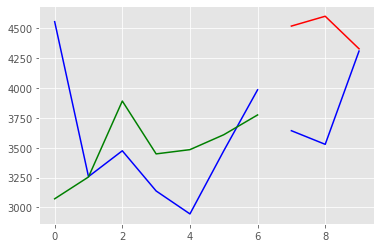

In [396]:
predictions16 = model16.predict(x_test16)
predictions_train16 = model16.predict(x_train16)

print(x_train16.shape)
print(y_train16.shape)
print(x_test16.shape)
print(y_test16.shape)
print(NN_AC_sku77.shape)

x2_16 = numpy.arange(0, 7, 1)
x3_16 = numpy.arange(7, 10, 1)

plt.plot(x2_16, y_train16, color='blue')
plt.plot(x2_16, predictions_train16, color='green')
plt.plot(x3_16, y_test16, color='blue')
plt.plot(x3_16, predictions16, color='red')

# redline - прогноз, greenline - подгонка

In [397]:
print(predictions16)

[[4517.1484]
 [4599.405 ]
 [4327.1943]]


In [81]:
# -SKU#78-

In [409]:
AC_sku78 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #78')]
AC_sku78.drop('sku_id', axis=1, inplace=True)
#AC_sku78.iloc[:,1].plot()

NN_AC_sku78 = pd.DataFrame()

for i in range(12,0,-1):
    NN_AC_sku78['t-' + str(i)] = AC_sku78.iloc[:,1].shift(i)
    
NN_AC_sku78['t'] = AC_sku78.iloc[:,1].values
#print(NN_AC_sku78.head(13))

new_NN_AC_sku78 = NN_AC_sku78[12:]
#new_NN_AC_sku78.head()

y17 = new_NN_AC_sku78['t']
x17 = new_NN_AC_sku78.drop('t', axis=1)

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train17 = x17[:15]
y_train17 = y17[:15]
x_test17 = x17[15:]
y_test17 = y17[15:]

#print(new_NN_AC_sku78.shape)
#print(x_train17.shape)
#print(y_train17.shape)
#print(x_test17.shape)
#print(y_test17.shape)
#print(x_train17.head(5))

x_train17 = x_train17.values
y_train17 = y_train17.values
x_test17 = x_test17.values
y_test17 = y_test17.values

# NN

model17 = Sequential()
model17.add(Dense(6, input_dim=12, activation='relu'))
model17.add(Dense(1, activation='linear'))
model17.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape'])
model17.fit(x_train17, y_train17, epochs=300, batch_size=None)

Epoch 1/300
15/15 [==============================] - 10s 667ms/step - loss: 3471607.2500 - mean_absolute_percentage_error: 69.1784
Epoch 2/300
15/15 [==============================] - 0s 400us/step - loss: 3360118.5000 - mean_absolute_percentage_error: 70.7289
Epoch 3/300
15/15 [==============================] - 0s 731us/step - loss: 3245747.2500 - mean_absolute_percentage_error: 72.5101
Epoch 4/300
15/15 [==============================] - 0s 532us/step - loss: 3140937.2500 - mean_absolute_percentage_error: 74.3619
Epoch 5/300
15/15 [==============================] - 0s 798us/step - loss: 3050516.2500 - mean_absolute_percentage_error: 76.3158
Epoch 6/300
15/15 [==============================] - 0s 798us/step - loss: 2976289.0000 - mean_absolute_percentage_error: 78.4552
Epoch 7/300
15/15 [==============================] - 0s 997us/step - loss: 2917877.5000 - mean_absolute_percentage_error: 80.4730
Epoch 8/300
15/15 [==============================] - 0s 731us/step - loss: 2873877.2500 -

Epoch 64/300
15/15 [==============================] - 0s 665us/step - loss: 2167271.2500 - mean_absolute_percentage_error: 84.8658
Epoch 65/300
15/15 [==============================] - 0s 731us/step - loss: 2157213.5000 - mean_absolute_percentage_error: 84.7898
Epoch 66/300
15/15 [==============================] - 0s 731us/step - loss: 2147059.7500 - mean_absolute_percentage_error: 84.6697
Epoch 67/300
15/15 [==============================] - 0s 731us/step - loss: 2138095.5000 - mean_absolute_percentage_error: 84.5839
Epoch 68/300
15/15 [==============================] - 0s 798us/step - loss: 2129287.2500 - mean_absolute_percentage_error: 84.5338
Epoch 69/300
15/15 [==============================] - 0s 864us/step - loss: 2120109.7500 - mean_absolute_percentage_error: 84.4909
Epoch 70/300
15/15 [==============================] - 0s 665us/step - loss: 2110600.5000 - mean_absolute_percentage_error: 84.4562
Epoch 71/300
15/15 [==============================] - 0s 466us/step - loss: 2101205

Epoch 127/300
15/15 [==============================] - 0s 731us/step - loss: 1675411.7500 - mean_absolute_percentage_error: 83.4994
Epoch 128/300
15/15 [==============================] - 0s 665us/step - loss: 1669144.2500 - mean_absolute_percentage_error: 83.5031
Epoch 129/300
15/15 [==============================] - 0s 532us/step - loss: 1663032.8750 - mean_absolute_percentage_error: 83.4826
Epoch 130/300
15/15 [==============================] - 0s 864us/step - loss: 1656467.1250 - mean_absolute_percentage_error: 83.4092
Epoch 131/300
15/15 [==============================] - 0s 731us/step - loss: 1650764.3750 - mean_absolute_percentage_error: 83.3534
Epoch 132/300
15/15 [==============================] - 0s 799us/step - loss: 1644907.1250 - mean_absolute_percentage_error: 83.3144
Epoch 133/300
15/15 [==============================] - 0s 531us/step - loss: 1638735.1250 - mean_absolute_percentage_error: 83.2826
Epoch 134/300
15/15 [==============================] - 0s 798us/step - loss:

Epoch 190/300
15/15 [==============================] - 0s 797us/step - loss: 1343311.5000 - mean_absolute_percentage_error: 79.9518
Epoch 191/300
15/15 [==============================] - 0s 532us/step - loss: 1339936.6250 - mean_absolute_percentage_error: 79.9600
Epoch 192/300
15/15 [==============================] - 0s 798us/step - loss: 1335855.7500 - mean_absolute_percentage_error: 79.8992
Epoch 193/300
15/15 [==============================] - 0s 731us/step - loss: 1330912.8750 - mean_absolute_percentage_error: 79.7652
Epoch 194/300
15/15 [==============================] - 0s 798us/step - loss: 1326368.6250 - mean_absolute_percentage_error: 79.6237
Epoch 195/300
15/15 [==============================] - 0s 665us/step - loss: 1322508.0000 - mean_absolute_percentage_error: 79.5507
Epoch 196/300
15/15 [==============================] - 0s 931us/step - loss: 1318261.5000 - mean_absolute_percentage_error: 79.4919
Epoch 197/300
15/15 [==============================] - 0s 997us/step - loss:

Epoch 253/300
15/15 [==============================] - 0s 731us/step - loss: 1098167.1250 - mean_absolute_percentage_error: 74.0424
Epoch 254/300
15/15 [==============================] - 0s 532us/step - loss: 1094110.1250 - mean_absolute_percentage_error: 73.9849
Epoch 255/300
15/15 [==============================] - 0s 864us/step - loss: 1091167.1250 - mean_absolute_percentage_error: 74.0121
Epoch 256/300
15/15 [==============================] - 0s 797us/step - loss: 1087971.6250 - mean_absolute_percentage_error: 73.9721
Epoch 257/300
15/15 [==============================] - 0s 798us/step - loss: 1083618.1250 - mean_absolute_percentage_error: 73.7950
Epoch 258/300
15/15 [==============================] - 0s 931us/step - loss: 1080838.7500 - mean_absolute_percentage_error: 73.6295
Epoch 259/300
15/15 [==============================] - 0s 798us/step - loss: 1077808.7500 - mean_absolute_percentage_error: 73.4587
Epoch 260/300
15/15 [==============================] - 0s 466us/step - loss:

In [410]:
scores17 = model17.evaluate(x_test17, y_test17)
y_pred17 = model17.predict(x_test17)

def smape(y_test17, y_pred17):
    return 100/len(y_test17) * np.sum(2 * np.abs(y_pred17 - y_test17) / (np.abs(y_test17) + np.abs(y_pred17)))

print(smape(y_test17, y_pred17))
# Подсчитали SMAPE

3/3 [==============================] - 4s 1s/step
139.95478949398137


(15, 12)
(15,)
(3, 12)
(3,)
(30, 13)


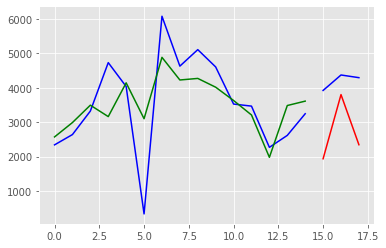

In [411]:
predictions17 = model17.predict(x_test17)
predictions_train17 = model17.predict(x_train17)

print(x_train17.shape)
print(y_train17.shape)
print(x_test17.shape)
print(y_test17.shape)
print(NN_AC_sku78.shape)

x2_17 = numpy.arange(0, 15, 1)
x3_17 = numpy.arange(15, 18, 1)

plt.plot(x2_17, y_train17, color='blue')
plt.plot(x2_17, predictions_train17, color='green')
plt.plot(x3_17, y_test17, color='blue')
plt.plot(x3_17, predictions17, color='red')

# redline - прогноз, greenline - подгонка

In [412]:
print(predictions17)

[[1935.4039]
 [3803.0889]
 [2343.8933]]


In [85]:
# -SKU#79-

In [417]:
AC_sku79 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #79')]
AC_sku79.drop('sku_id', axis=1, inplace=True)
#AC_sku79.iloc[:,1].plot()

NN_AC_sku79 = pd.DataFrame()

for i in range(12,0,-1):
    NN_AC_sku79['t-' + str(i)] = AC_sku79.iloc[:,1].shift(i)
    
NN_AC_sku79['t'] = AC_sku79.iloc[:,1].values
#print(NN_AC_sku79.head(13))

new_NN_AC_sku79 = NN_AC_sku79[12:]
#new_NN_AC_sku79.head()

y18 = new_NN_AC_sku79['t']
x18 = new_NN_AC_sku79.drop('t', axis=1)

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train18 = x18[:15]
y_train18 = y18[:15]
x_test18 = x18[15:]
y_test18 = y18[15:]

#print(new_NN_AC_sku79.shape)
#print(x_train18.shape)
#print(y_train18.shape)
#print(x_test18.shape)
#print(y_test18.shape)
#print(x_train18.head(5))

x_train18 = x_train18.values
y_train18 = y_train18.values
x_test18 = x_test18.values
y_test18 = y_test18.values

# NN

model18 = Sequential()
model18.add(Dense(6, input_dim=12, activation='relu'))
model18.add(Dense(1, activation='linear'))
model18.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape'])
model18.fit(x_train18, y_train18, epochs=300, batch_size=None)

Epoch 1/300
15/15 [==============================] - 11s 705ms/step - loss: 18067884.0000 - mean_absolute_percentage_error: 62.1321
Epoch 2/300
15/15 [==============================] - 0s 2ms/step - loss: 17291484.0000 - mean_absolute_percentage_error: 60.6548
Epoch 3/300
15/15 [==============================] - 0s 1ms/step - loss: 16551110.0000 - mean_absolute_percentage_error: 59.1978
Epoch 4/300
15/15 [==============================] - 0s 731us/step - loss: 15849282.0000 - mean_absolute_percentage_error: 57.7672
Epoch 5/300
15/15 [==============================] - 0s 1ms/step - loss: 15177068.0000 - mean_absolute_percentage_error: 56.3503
Epoch 6/300
15/15 [==============================] - 0s 796us/step - loss: 14542637.0000 - mean_absolute_percentage_error: 54.9659
Epoch 7/300
15/15 [==============================] - 0s 799us/step - loss: 13936256.0000 - mean_absolute_percentage_error: 53.5959
Epoch 8/300
15/15 [==============================] - 0s 996us/step - loss: 13357521.0000

Epoch 64/300
15/15 [==============================] - 0s 399us/step - loss: 4950683.5000 - mean_absolute_percentage_error: 26.4735
Epoch 65/300
15/15 [==============================] - 0s 730us/step - loss: 4931250.5000 - mean_absolute_percentage_error: 26.4090
Epoch 66/300
15/15 [==============================] - 0s 729us/step - loss: 4911762.0000 - mean_absolute_percentage_error: 26.3457
Epoch 67/300
15/15 [==============================] - 0s 598us/step - loss: 4892210.5000 - mean_absolute_percentage_error: 26.2836
Epoch 68/300
15/15 [==============================] - 0s 1000us/step - loss: 4872452.5000 - mean_absolute_percentage_error: 26.2221
Epoch 69/300
15/15 [==============================] - 0s 598us/step - loss: 4852763.5000 - mean_absolute_percentage_error: 26.1619
Epoch 70/300
15/15 [==============================] - 0s 1ms/step - loss: 4833008.5000 - mean_absolute_percentage_error: 26.1026
Epoch 71/300
15/15 [==============================] - 0s 465us/step - loss: 4813192.

Epoch 127/300
15/15 [==============================] - 0s 532us/step - loss: 3707531.5000 - mean_absolute_percentage_error: 22.6421
Epoch 128/300
15/15 [==============================] - 0s 599us/step - loss: 3687074.7500 - mean_absolute_percentage_error: 22.5681
Epoch 129/300
15/15 [==============================] - 0s 800us/step - loss: 3666684.2500 - mean_absolute_percentage_error: 22.4937
Epoch 130/300
15/15 [==============================] - 0s 596us/step - loss: 3646295.5000 - mean_absolute_percentage_error: 22.4187
Epoch 131/300
15/15 [==============================] - 0s 665us/step - loss: 3626057.0000 - mean_absolute_percentage_error: 22.3437
Epoch 132/300
15/15 [==============================] - 0s 731us/step - loss: 3605897.5000 - mean_absolute_percentage_error: 22.2684
Epoch 133/300
15/15 [==============================] - 0s 733us/step - loss: 3585822.5000 - mean_absolute_percentage_error: 22.1928
Epoch 134/300
15/15 [==============================] - 0s 931us/step - loss:

Epoch 190/300
15/15 [==============================] - 0s 663us/step - loss: 2689129.0000 - mean_absolute_percentage_error: 18.3878
Epoch 191/300
15/15 [==============================] - 0s 2ms/step - loss: 2675761.7500 - mean_absolute_percentage_error: 18.3304
Epoch 192/300
15/15 [==============================] - 0s 532us/step - loss: 2662415.5000 - mean_absolute_percentage_error: 18.2721
Epoch 193/300
15/15 [==============================] - 0s 663us/step - loss: 2649091.2500 - mean_absolute_percentage_error: 18.2129
Epoch 194/300
15/15 [==============================] - 0s 864us/step - loss: 2635796.5000 - mean_absolute_percentage_error: 18.1529
Epoch 195/300
15/15 [==============================] - 0s 933us/step - loss: 2622535.2500 - mean_absolute_percentage_error: 18.0922
Epoch 196/300
15/15 [==============================] - 0s 862us/step - loss: 2609582.7500 - mean_absolute_percentage_error: 18.0327
Epoch 197/300
15/15 [==============================] - 0s 528us/step - loss: 2

Epoch 253/300
15/15 [==============================] - 0s 729us/step - loss: 1974262.5000 - mean_absolute_percentage_error: 14.9959
Epoch 254/300
15/15 [==============================] - 0s 532us/step - loss: 1965048.1250 - mean_absolute_percentage_error: 14.9490
Epoch 255/300
15/15 [==============================] - 0s 2ms/step - loss: 1955901.6250 - mean_absolute_percentage_error: 14.9021
Epoch 256/300
15/15 [==============================] - 0s 665us/step - loss: 1946803.6250 - mean_absolute_percentage_error: 14.8551
Epoch 257/300
15/15 [==============================] - 0s 597us/step - loss: 1937754.2500 - mean_absolute_percentage_error: 14.8080
Epoch 258/300
15/15 [==============================] - 0s 798us/step - loss: 1928757.1250 - mean_absolute_percentage_error: 14.7608
Epoch 259/300
15/15 [==============================] - 0s 865us/step - loss: 1919811.3750 - mean_absolute_percentage_error: 14.7135
Epoch 260/300
15/15 [==============================] - 0s 461us/step - loss: 1

In [418]:
scores18 = model18.evaluate(x_test18, y_test18)
y_pred18 = model18.predict(x_test18)

def smape(y_test18, y_pred18):
    return 100/len(y_test18) * np.sum(2 * np.abs(y_pred18 - y_test18) / (np.abs(y_test18) + np.abs(y_pred18)))

print(smape(y_test18, y_pred18))
# Подсчитали SMAPE

3/3 [==============================] - 4s 1s/step
27.20038853807761


(15, 12)
(15,)
(3, 12)
(3,)
(30, 13)


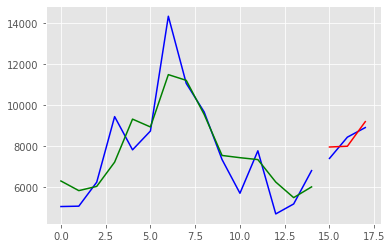

In [419]:
predictions18 = model18.predict(x_test18)
predictions_train18 = model18.predict(x_train18)

print(x_train18.shape)
print(y_train18.shape)
print(x_test18.shape)
print(y_test18.shape)
print(NN_AC_sku79.shape)

x2_18 = numpy.arange(0, 15, 1)
x3_18 = numpy.arange(15, 18, 1)

plt.plot(x2_18, y_train18, color='blue')
plt.plot(x2_18, predictions_train18, color='green')
plt.plot(x3_18, y_test18, color='blue')
plt.plot(x3_18, predictions18, color='red')

# redline - прогноз, greenline - подгонка

In [420]:
print(predictions18)

[[7961.3076]
 [8000.0503]
 [9197.962 ]]


In [89]:
# -SKU#94-

In [425]:
AC_sku94 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #94')]
AC_sku94.drop('sku_id', axis=1, inplace=True)
#AC_sku94.iloc[:,1].plot()

NN_AC_sku94 = pd.DataFrame()

for i in range(12,0,-1):
    NN_AC_sku94['t-' + str(i)] = AC_sku94.iloc[:,1].shift(i)
    
NN_AC_sku94['t'] = AC_sku94.iloc[:,1].values
#print(NN_AC_sku94.head(13))

new_NN_AC_sku94 = NN_AC_sku94[12:]
#new_NN_AC_sku94.head()

y19 = new_NN_AC_sku94['t']
x19 = new_NN_AC_sku94.drop('t', axis=1)

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train19 = x19[:5]
y_train19 = y19[:5]
x_test19 = x19[5:]
y_test19 = y19[5:]

#print(new_NN_AC_sku94.shape)
#print(x_train19.shape)
#print(y_train19.shape)
#print(x_test19.shape)
#print(y_test19.shape)
#print(x_train19.head(5))

x_train19 = x_train19.values
y_train19 = y_train19.values
x_test19 = x_test19.values
y_test19 = y_test19.values

# NN

model19 = Sequential()
model19.add(Dense(6, input_dim=12, activation='relu'))
model19.add(Dense(1, activation='linear'))
model19.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape'])
model19.fit(x_train19, y_train19, epochs=300, batch_size=None)

Epoch 1/300
5/5 [==============================] - 11s 2s/step - loss: 812751.3750 - mean_absolute_percentage_error: 70.2023
Epoch 2/300
5/5 [==============================] - 0s 2ms/step - loss: 767667.3750 - mean_absolute_percentage_error: 68.3599
Epoch 3/300
5/5 [==============================] - 0s 2ms/step - loss: 724874.8750 - mean_absolute_percentage_error: 66.5214
Epoch 4/300
5/5 [==============================] - 0s 2ms/step - loss: 684404.1250 - mean_absolute_percentage_error: 64.6889
Epoch 5/300
5/5 [==============================] - 0s 3ms/step - loss: 646276.6250 - mean_absolute_percentage_error: 62.8646
Epoch 6/300
5/5 [==============================] - 0s 2ms/step - loss: 610500.0625 - mean_absolute_percentage_error: 61.0507
Epoch 7/300
5/5 [==============================] - 0s 2ms/step - loss: 577067.0000 - mean_absolute_percentage_error: 59.2497
Epoch 8/300
5/5 [==============================] - 0s 2ms/step - loss: 545956.4375 - mean_absolute_percentage_error: 57.4645


5/5 [==============================] - 0s 2ms/step - loss: 169999.3750 - mean_absolute_percentage_error: 23.1764
Epoch 67/300
5/5 [==============================] - 0s 2ms/step - loss: 167108.5469 - mean_absolute_percentage_error: 23.0073
Epoch 68/300
5/5 [==============================] - 0s 2ms/step - loss: 164249.8750 - mean_absolute_percentage_error: 22.8339
Epoch 69/300
5/5 [==============================] - 0s 2ms/step - loss: 161423.1562 - mean_absolute_percentage_error: 22.6564
Epoch 70/300
5/5 [==============================] - 0s 2ms/step - loss: 158628.2031 - mean_absolute_percentage_error: 22.4751
Epoch 71/300
5/5 [==============================] - 0s 2ms/step - loss: 155865.2344 - mean_absolute_percentage_error: 22.2903
Epoch 72/300
5/5 [==============================] - 0s 2ms/step - loss: 153134.7188 - mean_absolute_percentage_error: 22.1024
Epoch 73/300
5/5 [==============================] - 0s 2ms/step - loss: 150437.0781 - mean_absolute_percentage_error: 21.9469
Epoch

Epoch 132/300
5/5 [==============================] - 0s 2ms/step - loss: 59003.3008 - mean_absolute_percentage_error: 15.2397
Epoch 133/300
5/5 [==============================] - 0s 3ms/step - loss: 58254.6133 - mean_absolute_percentage_error: 15.1228
Epoch 134/300
5/5 [==============================] - 0s 2ms/step - loss: 57504.8750 - mean_absolute_percentage_error: 15.0037
Epoch 135/300
5/5 [==============================] - 0s 2ms/step - loss: 56756.8125 - mean_absolute_percentage_error: 14.8828
Epoch 136/300
5/5 [==============================] - 0s 2ms/step - loss: 56012.8125 - mean_absolute_percentage_error: 14.7606
Epoch 137/300
5/5 [==============================] - 0s 2ms/step - loss: 55272.0234 - mean_absolute_percentage_error: 14.6371
Epoch 138/300
5/5 [==============================] - 0s 3ms/step - loss: 54540.7383 - mean_absolute_percentage_error: 14.5134
Epoch 139/300
5/5 [==============================] - 0s 2ms/step - loss: 53816.8945 - mean_absolute_percentage_error: 

Epoch 198/300
5/5 [==============================] - 0s 2ms/step - loss: 22944.4258 - mean_absolute_percentage_error: 8.8482
Epoch 199/300
5/5 [==============================] - 0s 2ms/step - loss: 22580.1094 - mean_absolute_percentage_error: 8.7782
Epoch 200/300
5/5 [==============================] - 0s 2ms/step - loss: 22218.6348 - mean_absolute_percentage_error: 8.7102
Epoch 201/300
5/5 [==============================] - 0s 1ms/step - loss: 21859.5352 - mean_absolute_percentage_error: 8.6435
Epoch 202/300
5/5 [==============================] - 0s 2ms/step - loss: 21533.5898 - mean_absolute_percentage_error: 8.5815
Epoch 203/300
5/5 [==============================] - 0s 2ms/step - loss: 21197.9648 - mean_absolute_percentage_error: 8.5094
Epoch 204/300
5/5 [==============================] - 0s 3ms/step - loss: 20842.2715 - mean_absolute_percentage_error: 8.4269
Epoch 205/300
5/5 [==============================] - 0s 3ms/step - loss: 20509.9004 - mean_absolute_percentage_error: 8.3399


Epoch 264/300
5/5 [==============================] - 0s 2ms/step - loss: 7143.3110 - mean_absolute_percentage_error: 4.8102
Epoch 265/300
5/5 [==============================] - 0s 2ms/step - loss: 7006.9141 - mean_absolute_percentage_error: 4.7566
Epoch 266/300
5/5 [==============================] - 0s 1ms/step - loss: 6871.0806 - mean_absolute_percentage_error: 4.7064
Epoch 267/300
5/5 [==============================] - 0s 3ms/step - loss: 6735.8398 - mean_absolute_percentage_error: 4.6591
Epoch 268/300
5/5 [==============================] - 0s 3ms/step - loss: 6601.3984 - mean_absolute_percentage_error: 4.6146
Epoch 269/300
5/5 [==============================] - 0s 2ms/step - loss: 6468.0127 - mean_absolute_percentage_error: 4.5725
Epoch 270/300
5/5 [==============================] - 0s 3ms/step - loss: 6336.0054 - mean_absolute_percentage_error: 4.5324
Epoch 271/300
5/5 [==============================] - 0s 2ms/step - loss: 6205.6665 - mean_absolute_percentage_error: 4.4939
Epoch 27

In [426]:
scores19 = model19.evaluate(x_test19, y_test19)
y_pred19 = model19.predict(x_test19)

def smape(y_test19, y_pred19):
    return 100/len(y_test19) * np.sum(2 * np.abs(y_pred19 - y_test19) / (np.abs(y_test19) + np.abs(y_pred19)))

print(smape(y_test19, y_pred19))
# Подсчитали SMAPE

3/3 [==============================] - 4s 1s/step
233.37103066256375


(5, 12)
(5,)
(3, 12)
(3,)
(20, 13)


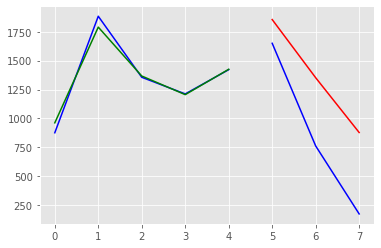

In [427]:
predictions19 = model19.predict(x_test19)
predictions_train19 = model19.predict(x_train19)

print(x_train19.shape)
print(y_train19.shape)
print(x_test19.shape)
print(y_test19.shape)
print(NN_AC_sku94.shape)

x2_19 = numpy.arange(0, 5, 1)
x3_19 = numpy.arange(5, 8, 1)

plt.plot(x2_19, y_train19, color='blue')
plt.plot(x2_19, predictions_train19, color='green')
plt.plot(x3_19, y_test19, color='blue')
plt.plot(x3_19, predictions19, color='red')

# redline - прогноз, greenline - подгонка

In [428]:
print(predictions19)

[[1855.3466 ]
 [1352.118  ]
 [ 878.26874]]


In [93]:
# -SKU#97-

In [438]:
AC_sku97 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #97')]
AC_sku97.drop('sku_id', axis=1, inplace=True)
#AC_sku97.iloc[:,1].plot()

NN_AC_sku97 = pd.DataFrame()

for i in range(12,0,-1):
    NN_AC_sku97['t-' + str(i)] = AC_sku97.iloc[:,1].shift(i)
    
NN_AC_sku97['t'] = AC_sku97.iloc[:,1].values
#print(NN_AC_sku97.head(13))

new_NN_AC_sku97 = NN_AC_sku97[12:]
#new_NN_AC_sku97.head()

y20 = new_NN_AC_sku97['t']
x20 = new_NN_AC_sku97.drop('t', axis=1)

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train20 = x20[:7]
y_train20 = y20[:7]
x_test20 = x20[7:]
y_test20 = y20[7:]

#print(new_NN_AC_sku97.shape)
#print(x_train20.shape)
#print(y_train20.shape)
#print(x_test20.shape)
#print(y_test20.shape)
#print(x_train20.head(5))

x_train20 = x_train20.values
y_train20 = y_train20.values
x_test20 = x_test20.values
y_test20 = y_test20.values

# NN

model20 = Sequential()
model20.add(Dense(6, input_dim=12, activation='relu'))
model20.add(Dense(1, activation='linear'))
model20.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape'])
model20.fit(x_train20, y_train20, epochs=300, batch_size=None)

Epoch 1/300
7/7 [==============================] - 11s 2s/step - loss: 100522040.0000 - mean_absolute_percentage_error: 201.2947
Epoch 2/300
7/7 [==============================] - 0s 855us/step - loss: 99590120.0000 - mean_absolute_percentage_error: 200.3589
Epoch 3/300
7/7 [==============================] - 0s 2ms/step - loss: 98666136.0000 - mean_absolute_percentage_error: 199.4267
Epoch 4/300
7/7 [==============================] - 0s 1ms/step - loss: 97750224.0000 - mean_absolute_percentage_error: 198.4984
Epoch 5/300
7/7 [==============================] - 0s 2ms/step - loss: 96842440.0000 - mean_absolute_percentage_error: 197.5739
Epoch 6/300
7/7 [==============================] - 0s 2ms/step - loss: 95942840.0000 - mean_absolute_percentage_error: 196.6534
Epoch 7/300
7/7 [==============================] - 0s 1ms/step - loss: 95051528.0000 - mean_absolute_percentage_error: 195.7371
Epoch 8/300
7/7 [==============================] - 0s 3ms/step - loss: 94168552.0000 - mean_absolute_

Epoch 65/300
7/7 [==============================] - 0s 2ms/step - loss: 57076936.0000 - mean_absolute_percentage_error: 151.6117
Epoch 66/300
7/7 [==============================] - 0s 1ms/step - loss: 56620644.0000 - mean_absolute_percentage_error: 151.0029
Epoch 67/300
7/7 [==============================] - 0s 2ms/step - loss: 56169380.0000 - mean_absolute_percentage_error: 150.3983
Epoch 68/300
7/7 [==============================] - 0s 2ms/step - loss: 55723080.0000 - mean_absolute_percentage_error: 149.7980
Epoch 69/300
7/7 [==============================] - 0s 1ms/step - loss: 55281672.0000 - mean_absolute_percentage_error: 149.2020
Epoch 70/300
7/7 [==============================] - 0s 2ms/step - loss: 54845056.0000 - mean_absolute_percentage_error: 148.6100
Epoch 71/300
7/7 [==============================] - 0s 1ms/step - loss: 54413164.0000 - mean_absolute_percentage_error: 148.0221
Epoch 72/300
7/7 [==============================] - 0s 2ms/step - loss: 53985928.0000 - mean_abso

Epoch 129/300
7/7 [==============================] - 0s 2ms/step - loss: 40476004.0000 - mean_absolute_percentage_error: 127.2191
Epoch 130/300
7/7 [==============================] - 0s 2ms/step - loss: 40327892.0000 - mean_absolute_percentage_error: 126.9818
Epoch 131/300
7/7 [==============================] - 0s 2ms/step - loss: 40181580.0000 - mean_absolute_percentage_error: 126.7470
Epoch 132/300
7/7 [==============================] - 0s 1ms/step - loss: 40036500.0000 - mean_absolute_percentage_error: 126.5138
Epoch 133/300
7/7 [==============================] - 0s 2ms/step - loss: 39892628.0000 - mean_absolute_percentage_error: 126.2822
Epoch 134/300
7/7 [==============================] - 0s 2ms/step - loss: 39749428.0000 - mean_absolute_percentage_error: 126.0512
Epoch 135/300
7/7 [==============================] - 0s 2ms/step - loss: 39607884.0000 - mean_absolute_percentage_error: 125.8225
Epoch 136/300
7/7 [==============================] - 0s 1ms/step - loss: 39466980.0000 - m

7/7 [==============================] - 0s 2ms/step - loss: 32982746.0000 - mean_absolute_percentage_error: 114.6064
Epoch 193/300
7/7 [==============================] - 0s 1ms/step - loss: 32887026.0000 - mean_absolute_percentage_error: 114.4361
Epoch 194/300
7/7 [==============================] - 0s 1ms/step - loss: 32791878.0000 - mean_absolute_percentage_error: 114.2665
Epoch 195/300
7/7 [==============================] - 0s 2ms/step - loss: 32697520.0000 - mean_absolute_percentage_error: 114.0981
Epoch 196/300
7/7 [==============================] - 0s 4ms/step - loss: 32603504.0000 - mean_absolute_percentage_error: 113.9301
Epoch 197/300
7/7 [==============================] - 0s 2ms/step - loss: 32510038.0000 - mean_absolute_percentage_error: 113.7628
Epoch 198/300
7/7 [==============================] - 0s 2ms/step - loss: 32417130.0000 - mean_absolute_percentage_error: 113.5962
Epoch 199/300
7/7 [==============================] - 0s 2ms/step - loss: 32324972.0000 - mean_absolute_p

Epoch 256/300
7/7 [==============================] - 0s 2ms/step - loss: 28159166.0000 - mean_absolute_percentage_error: 105.7878
Epoch 257/300
7/7 [==============================] - 0s 1ms/step - loss: 28096530.0000 - mean_absolute_percentage_error: 105.6690
Epoch 258/300
7/7 [==============================] - 0s 1ms/step - loss: 28034250.0000 - mean_absolute_percentage_error: 105.5508
Epoch 259/300
7/7 [==============================] - 0s 4ms/step - loss: 27972106.0000 - mean_absolute_percentage_error: 105.4327
Epoch 260/300
7/7 [==============================] - 0s 1ms/step - loss: 27910204.0000 - mean_absolute_percentage_error: 105.3149
Epoch 261/300
7/7 [==============================] - 0s 2ms/step - loss: 27848640.0000 - mean_absolute_percentage_error: 105.1976
Epoch 262/300
7/7 [==============================] - 0s 2ms/step - loss: 27787206.0000 - mean_absolute_percentage_error: 105.0805
Epoch 263/300
7/7 [==============================] - 0s 3ms/step - loss: 27726106.0000 - m

In [433]:
scores20 = model20.evaluate(x_test20, y_test20)
y_pred20 = model20.predict(x_test20)

def smape(y_test20, y_pred20):
    return 100/len(y_test20) * np.sum(2 * np.abs(y_pred20 - y_test20) / (np.abs(y_test20) + np.abs(y_pred20)))

print(smape(y_test20, y_pred20))
# Подсчитали SMAPE

3/3 [==============================] - 4s 1s/step
56.72089645736958


(7, 12)
(7,)
(3, 12)
(3,)
(22, 13)


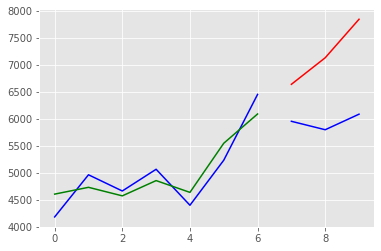

In [434]:
predictions20 = model20.predict(x_test20)
predictions_train20 = model20.predict(x_train20)

print(x_train20.shape)
print(y_train20.shape)
print(x_test20.shape)
print(y_test20.shape)
print(NN_AC_sku97.shape)

x2_20 = numpy.arange(0, 7, 1)
x3_20 = numpy.arange(7, 10, 1)

plt.plot(x2_20, y_train20, color='blue')
plt.plot(x2_20, predictions_train20, color='green')
plt.plot(x3_20, y_test20, color='blue')
plt.plot(x3_20, predictions20, color='red')

# redline - прогноз, greenline - подгонка

In [435]:
print(predictions20)

[[6637.0703]
 [7128.497 ]
 [7841.4624]]


In [97]:
# -SKU#100-

In [444]:
AC_sku100 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #100')]
AC_sku100.drop('sku_id', axis=1, inplace=True)
#AC_sku100.iloc[:,1].plot()

NN_AC_sku100 = pd.DataFrame()

for i in range(12,0,-1):
    NN_AC_sku100['t-' + str(i)] = AC_sku100.iloc[:,1].shift(i)
    
NN_AC_sku100['t'] = AC_sku100.iloc[:,1].values
#print(NN_AC_sku100.head(13))

new_NN_AC_sku100 = NN_AC_sku100[12:]
#new_NN_AC_sku100.head()

y21 = new_NN_AC_sku100['t']
x21 = new_NN_AC_sku100.drop('t', axis=1)

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train21 = x21[:4]
y_train21 = y21[:4]
x_test21 = x21[4:]
y_test21 = y21[4:]

#print(new_NN_AC_sku100.shape)
#print(x_train21.shape)
#print(y_train21.shape)
#print(x_test21.shape)
#print(y_test21.shape)
#print(x_train21.head(5))

x_train21 = x_train21.values
y_train21 = y_train21.values
x_test21 = x_test21.values
y_test21 = y_test21.values

# NN

model21 = Sequential()
model21.add(Dense(6, input_dim=12, activation='relu'))
model21.add(Dense(1, activation='linear'))
model21.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape'])
model21.fit(x_train21, y_train21, epochs=300, batch_size=None)

Epoch 1/300
4/4 [==============================] - 11s 3s/step - loss: 660873.8125 - mean_absolute_percentage_error: 30.9304
Epoch 2/300
4/4 [==============================] - 0s 5ms/step - loss: 629206.1250 - mean_absolute_percentage_error: 30.2267
Epoch 3/300
4/4 [==============================] - 0s 5ms/step - loss: 598314.0625 - mean_absolute_percentage_error: 29.5210
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 568219.2500 - mean_absolute_percentage_error: 28.8137
Epoch 5/300
4/4 [==============================] - 0s 11ms/step - loss: 538942.5625 - mean_absolute_percentage_error: 28.1048
Epoch 6/300
4/4 [==============================] - 0s 2ms/step - loss: 510503.0625 - mean_absolute_percentage_error: 27.3946
Epoch 7/300
4/4 [==============================] - 0s 3ms/step - loss: 482918.3125 - mean_absolute_percentage_error: 26.6833
Epoch 8/300
4/4 [==============================] - 0s 2ms/step - loss: 456204.7188 - mean_absolute_percentage_error: 25.9714

Epoch 67/300
4/4 [==============================] - 0s 2ms/step - loss: 16237.0908 - mean_absolute_percentage_error: 5.3216
Epoch 68/300
4/4 [==============================] - 0s 2ms/step - loss: 15568.1855 - mean_absolute_percentage_error: 5.2074
Epoch 69/300
4/4 [==============================] - 0s 3ms/step - loss: 14924.2686 - mean_absolute_percentage_error: 5.0960
Epoch 70/300
4/4 [==============================] - 0s 2ms/step - loss: 14299.8936 - mean_absolute_percentage_error: 4.9867
Epoch 71/300
4/4 [==============================] - 0s 2ms/step - loss: 13694.9492 - mean_absolute_percentage_error: 4.8794
Epoch 72/300
4/4 [==============================] - 0s 3ms/step - loss: 13109.5781 - mean_absolute_percentage_error: 4.7739
Epoch 73/300
4/4 [==============================] - 0s 3ms/step - loss: 12544.2188 - mean_absolute_percentage_error: 4.6704
Epoch 74/300
4/4 [==============================] - 0s 3ms/step - loss: 11999.3672 - mean_absolute_percentage_error: 4.5687
Epoch 75

Epoch 134/300
4/4 [==============================] - 0s 2ms/step - loss: 1048.5356 - mean_absolute_percentage_error: 1.1481
Epoch 135/300
4/4 [==============================] - 0s 5ms/step - loss: 1019.0605 - mean_absolute_percentage_error: 1.1292
Epoch 136/300
4/4 [==============================] - 0s 3ms/step - loss: 986.3655 - mean_absolute_percentage_error: 1.1161
Epoch 137/300
4/4 [==============================] - 0s 2ms/step - loss: 959.2269 - mean_absolute_percentage_error: 1.1050
Epoch 138/300
4/4 [==============================] - 0s 3ms/step - loss: 932.8348 - mean_absolute_percentage_error: 1.0941
Epoch 139/300
4/4 [==============================] - 0s 4ms/step - loss: 906.5880 - mean_absolute_percentage_error: 1.0836
Epoch 140/300
4/4 [==============================] - 0s 3ms/step - loss: 880.1328 - mean_absolute_percentage_error: 1.0735
Epoch 141/300
4/4 [==============================] - 0s 6ms/step - loss: 861.2938 - mean_absolute_percentage_error: 1.0673
Epoch 142/300


Epoch 201/300
4/4 [==============================] - 0s 2ms/step - loss: 143.3067 - mean_absolute_percentage_error: 0.4810
Epoch 202/300
4/4 [==============================] - 0s 4ms/step - loss: 138.6160 - mean_absolute_percentage_error: 0.4731
Epoch 203/300
4/4 [==============================] - 0s 2ms/step - loss: 133.9432 - mean_absolute_percentage_error: 0.4643
Epoch 204/300
4/4 [==============================] - 0s 4ms/step - loss: 129.7414 - mean_absolute_percentage_error: 0.4565
Epoch 205/300
4/4 [==============================] - 0s 2ms/step - loss: 125.4385 - mean_absolute_percentage_error: 0.4490
Epoch 206/300
4/4 [==============================] - 0s 3ms/step - loss: 121.0761 - mean_absolute_percentage_error: 0.4418
Epoch 207/300
4/4 [==============================] - 0s 3ms/step - loss: 117.1597 - mean_absolute_percentage_error: 0.4353
Epoch 208/300
4/4 [==============================] - 0s 3ms/step - loss: 113.0923 - mean_absolute_percentage_error: 0.4277
Epoch 209/300
4/

Epoch 269/300
4/4 [==============================] - 0s 3ms/step - loss: 11.4265 - mean_absolute_percentage_error: 0.1358
Epoch 270/300
4/4 [==============================] - 0s 3ms/step - loss: 10.9383 - mean_absolute_percentage_error: 0.1333
Epoch 271/300
4/4 [==============================] - 0s 3ms/step - loss: 10.5284 - mean_absolute_percentage_error: 0.1308
Epoch 272/300
4/4 [==============================] - 0s 2ms/step - loss: 10.0495 - mean_absolute_percentage_error: 0.1277
Epoch 273/300
4/4 [==============================] - 0s 2ms/step - loss: 9.6485 - mean_absolute_percentage_error: 0.1250
Epoch 274/300
4/4 [==============================] - 0s 2ms/step - loss: 9.2516 - mean_absolute_percentage_error: 0.1223
Epoch 275/300
4/4 [==============================] - 0s 2ms/step - loss: 8.8578 - mean_absolute_percentage_error: 0.1198
Epoch 276/300
4/4 [==============================] - 0s 8ms/step - loss: 8.5419 - mean_absolute_percentage_error: 0.1176
Epoch 277/300
4/4 [=========

In [445]:
scores21 = model21.evaluate(x_test21, y_test21)
y_pred21 = model21.predict(x_test21)

def smape(y_test21, y_pred21):
    return 100/len(y_test21) * np.sum(2 * np.abs(y_pred21 - y_test21) / (np.abs(y_test21) + np.abs(y_pred21)))

print(smape(y_test21, y_pred21))
# Подсчитали SMAPE

3/3 [==============================] - 4s 1s/step
89.15134649396028


(4, 12)
(4,)
(3, 12)
(3,)
(19, 13)


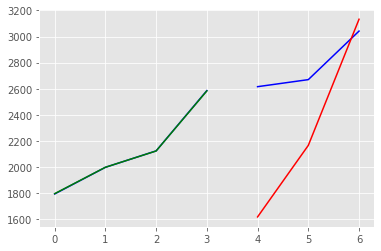

In [446]:
predictions21 = model21.predict(x_test21)
predictions_train21 = model21.predict(x_train21)

print(x_train21.shape)
print(y_train21.shape)
print(x_test21.shape)
print(y_test21.shape)
print(NN_AC_sku100.shape)

x2_21 = numpy.arange(0, 4, 1)
x3_21 = numpy.arange(4, 7, 1)

plt.plot(x2_21, y_train21, color='blue')
plt.plot(x2_21, predictions_train21, color='green')
plt.plot(x3_21, y_test21, color='blue')
plt.plot(x3_21, predictions21, color='red')

# redline - прогноз, greenline - подгонка

In [447]:
print(predictions21)

[[1618.0986]
 [2166.138 ]
 [3132.6794]]


In [101]:
# -SKU#106-

In [453]:
AC_sku106 = df_for_AC.loc[(df_for_AC['sku_id'] == 'sku #106')]
AC_sku106.drop('sku_id', axis=1, inplace=True)
#AC_sku106.iloc[:,1].plot()

NN_AC_sku106 = pd.DataFrame()

for i in range(12,0,-1):
    NN_AC_sku106['t-' + str(i)] = AC_sku106.iloc[:,1].shift(i)
    
NN_AC_sku106['t'] = AC_sku106.iloc[:,1].values
#print(NN_AC_sku106.head(13))

new_NN_AC_sku106 = NN_AC_sku106[12:]
#new_NN_AC_sku106.head()

y22 = new_NN_AC_sku106['t']
x22 = new_NN_AC_sku106.drop('t', axis=1)

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train22 = x22[:7]
y_train22 = y22[:7]
x_test22 = x22[7:]
y_test22 = y22[7:]

#print(new_NN_AC_sku106.shape)
#print(x_train22.shape)
#print(y_train22.shape)
#print(x_test22.shape)
#print(y_test22.shape)
#print(x_train22.head(5))

x_train22 = x_train22.values
y_train22 = y_train22.values
x_test22 = x_test22.values
y_test22 = y_test22.values

# NN

model22 = Sequential()
model22.add(Dense(6, input_dim=12, activation='relu'))
model22.add(Dense(1, activation='linear'))
model22.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape'])
model22.fit(x_train22, y_train22, epochs=300, batch_size=None)

Epoch 1/300
7/7 [==============================] - 12s 2s/step - loss: 300711.3438 - mean_absolute_percentage_error: 15.6493
Epoch 2/300
7/7 [==============================] - 0s 4ms/step - loss: 282738.4688 - mean_absolute_percentage_error: 15.3591
Epoch 3/300
7/7 [==============================] - 0s 2ms/step - loss: 269271.9062 - mean_absolute_percentage_error: 15.0687
Epoch 4/300
7/7 [==============================] - 0s 2ms/step - loss: 259826.6250 - mean_absolute_percentage_error: 15.0045
Epoch 5/300
7/7 [==============================] - 0s 2ms/step - loss: 252003.4531 - mean_absolute_percentage_error: 15.0464
Epoch 6/300
7/7 [==============================] - 0s 2ms/step - loss: 245185.5781 - mean_absolute_percentage_error: 15.0457
Epoch 7/300
7/7 [==============================] - 0s 2ms/step - loss: 239717.1094 - mean_absolute_percentage_error: 15.0236
Epoch 8/300
7/7 [==============================] - 0s 1ms/step - loss: 235123.5781 - mean_absolute_percentage_error: 14.9812


Epoch 67/300
7/7 [==============================] - 0s 2ms/step - loss: 89188.6250 - mean_absolute_percentage_error: 8.4590
Epoch 68/300
7/7 [==============================] - 0s 2ms/step - loss: 87985.6406 - mean_absolute_percentage_error: 8.3770
Epoch 69/300
7/7 [==============================] - 0s 2ms/step - loss: 86788.5625 - mean_absolute_percentage_error: 8.2963
Epoch 70/300
7/7 [==============================] - 0s 2ms/step - loss: 85613.8047 - mean_absolute_percentage_error: 8.2180
Epoch 71/300
7/7 [==============================] - 0s 5ms/step - loss: 84452.6797 - mean_absolute_percentage_error: 8.1415
Epoch 72/300
7/7 [==============================] - 0s 2ms/step - loss: 83335.4375 - mean_absolute_percentage_error: 8.0731
Epoch 73/300
7/7 [==============================] - 0s 993us/step - loss: 82232.5625 - mean_absolute_percentage_error: 8.0089
Epoch 74/300
7/7 [==============================] - 0s 1ms/step - loss: 81123.5391 - mean_absolute_percentage_error: 7.9452
Epoch 

Epoch 133/300
7/7 [==============================] - 0s 1ms/step - loss: 33626.6484 - mean_absolute_percentage_error: 5.1951
Epoch 134/300
7/7 [==============================] - 0s 2ms/step - loss: 33072.7656 - mean_absolute_percentage_error: 5.1541
Epoch 135/300
7/7 [==============================] - 0s 2ms/step - loss: 32525.0977 - mean_absolute_percentage_error: 5.1127
Epoch 136/300
7/7 [==============================] - 0s 2ms/step - loss: 31985.6289 - mean_absolute_percentage_error: 5.0711
Epoch 137/300
7/7 [==============================] - 0s 2ms/step - loss: 31450.7969 - mean_absolute_percentage_error: 5.0293
Epoch 138/300
7/7 [==============================] - 0s 2ms/step - loss: 30922.4590 - mean_absolute_percentage_error: 4.9875
Epoch 139/300
7/7 [==============================] - 0s 2ms/step - loss: 30403.6562 - mean_absolute_percentage_error: 4.9468
Epoch 140/300
7/7 [==============================] - 0s 2ms/step - loss: 29888.5059 - mean_absolute_percentage_error: 4.9080


Epoch 199/300
7/7 [==============================] - 0s 2ms/step - loss: 9838.0381 - mean_absolute_percentage_error: 2.8617
Epoch 200/300
7/7 [==============================] - 0s 2ms/step - loss: 9636.4160 - mean_absolute_percentage_error: 2.8312
Epoch 201/300
7/7 [==============================] - 0s 2ms/step - loss: 9438.2656 - mean_absolute_percentage_error: 2.8007
Epoch 202/300
7/7 [==============================] - 0s 1ms/step - loss: 9243.5781 - mean_absolute_percentage_error: 2.7702
Epoch 203/300
7/7 [==============================] - 0s 2ms/step - loss: 9052.2803 - mean_absolute_percentage_error: 2.7399
Epoch 204/300
7/7 [==============================] - 0s 2ms/step - loss: 8864.3828 - mean_absolute_percentage_error: 2.7098
Epoch 205/300
7/7 [==============================] - 0s 3ms/step - loss: 8679.7861 - mean_absolute_percentage_error: 2.6800
Epoch 206/300
7/7 [==============================] - 0s 1ms/step - loss: 8498.4932 - mean_absolute_percentage_error: 2.6505
Epoch 20

7/7 [==============================] - 0s 2ms/step - loss: 2211.8015 - mean_absolute_percentage_error: 1.3540
Epoch 266/300
7/7 [==============================] - 0s 1ms/step - loss: 2158.5081 - mean_absolute_percentage_error: 1.3385
Epoch 267/300
7/7 [==============================] - 0s 2ms/step - loss: 2106.4094 - mean_absolute_percentage_error: 1.3231
Epoch 268/300
7/7 [==============================] - 0s 2ms/step - loss: 2055.4797 - mean_absolute_percentage_error: 1.3080
Epoch 269/300
7/7 [==============================] - 0s 2ms/step - loss: 2005.6755 - mean_absolute_percentage_error: 1.2930
Epoch 270/300
7/7 [==============================] - 0s 2ms/step - loss: 1956.9799 - mean_absolute_percentage_error: 1.2781
Epoch 271/300
7/7 [==============================] - 0s 3ms/step - loss: 1909.3870 - mean_absolute_percentage_error: 1.2635
Epoch 272/300
7/7 [==============================] - 0s 2ms/step - loss: 1862.8541 - mean_absolute_percentage_error: 1.2489
Epoch 273/300
7/7 [===

In [454]:
scores22 = model22.evaluate(x_test22, y_test22)
y_pred22 = model22.predict(x_test22)

def smape(y_test22, y_pred22):
    return 100/len(y_test22) * np.sum(2 * np.abs(y_pred22 - y_test22) / (np.abs(y_test22) + np.abs(y_pred22)))

print(smape(y_test22, y_pred22))
# Подсчитали SMAPE

3/3 [==============================] - 4s 1s/step
46.13331340945977


(7, 12)
(7,)
(3, 12)
(3,)
(22, 13)


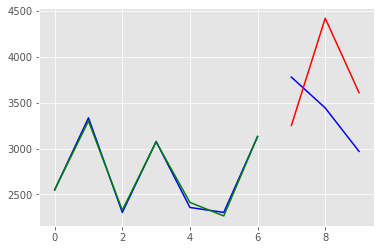

In [455]:
predictions22 = model22.predict(x_test22)
predictions_train22 = model22.predict(x_train22)

print(x_train22.shape)
print(y_train22.shape)
print(x_test22.shape)
print(y_test22.shape)
print(NN_AC_sku106.shape)

x2_22 = numpy.arange(0, 7, 1)
x3_22 = numpy.arange(7, 10, 1)

plt.plot(x2_22, y_train22, color='blue')
plt.plot(x2_22, predictions_train22, color='green')
plt.plot(x3_22, y_test22, color='blue')
plt.plot(x3_22, predictions22, color='red')

# redline - прогноз, greenline - подгонка

In [456]:
print(predictions22)

[[3252.8894]
 [4422.509 ]
 [3610.3538]]
